<a href="https://colab.research.google.com/github/prof-sd1/Data-Science/blob/main/Module_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 7: Feature Engineering & Preprocessing

## 7.1 Feature Extraction & Selection

#### **7.1.1 Introduction to Features and Feature Engineering**

  * **Raw Data:** The original, unprocessed data collected from various sources. It's often messy, incomplete, and not directly usable by most machine learning algorithms.
  * **Features:** Individual measurable properties or characteristics of the phenomenon being observed. In a dataset, features are typically represented as columns, and instances (observations) are rows. Features serve as the input variables ($X$) for machine learning models.
      * *Examples:* Age, income, number of rooms, color, sentiment score.
  * **Feature Engineering:** The process of creating new features or transforming existing ones from raw data to make machine learning algorithms work more effectively. It involves leveraging domain knowledge and creativity to "tell" the model more about the data.
      * Often called "art" in data science due to its reliance on creativity and domain expertise.
      * **Goal:**
          * Improve model performance (accuracy, precision, recall, etc.).
          * Help models converge faster.
          * Reduce model complexity and make it more interpretable.
          * Handle specific data types or distributions (e.g., categorical data, skewed numerical data).

-----

#### **7.1.2 Feature Extraction**

Feature extraction is the process of creating new features from raw data. This often involves combining existing features or deriving higher-level, more abstract features that capture the underlying information better.

**A. For Numerical Features:**

1.  **Binning (Discretization):** Converting continuous numerical features into discrete categories (bins).

      * *Why:* Can help capture non-linear relationships, reduce noise, and make skewed distributions more manageable.
      * *Methods:*
          * **Fixed-width binning:** Define bin boundaries manually (e.g., age groups: 0-18, 19-35, 36-60, 60+).
          * **Quantile binning:** Divide data into bins containing an equal number of observations (e.g., quartiles, deciles).
      * *Example:* Convert 'Age' (continuous) into 'Age\_Group' (categorical: 'Young', 'Middle-aged', 'Senior').

2.  **Polynomial Features:** Creating new features by raising existing features to a power (e.g., $x^2, x^3$) or by multiplying features together (interaction terms, e.g., $x\_1 \* x\_2$).

      * *Why:* To capture non-linear relationships or interactions between features.
      * *Example:* If predicting house price from 'Square Footage', adding 'Square Footage'^2 might capture diminishing returns. If 'Education' and 'Experience' interact, adding 'Education \* Experience' might be useful.

3.  **Log Transformation:** Applying a logarithmic function (e.g., $\\log(x)$ or $\\ln(x)$) to a numerical feature.

      * *Why:* To reduce the skewness of a distribution (make it more symmetrical/normal-like), handle large ranges of values, or linearize relationships that are exponential.
      * *Example:* 'Income', 'Population', 'Price' are often positively skewed and benefit from log transformation.

4.  **Mathematical Combinations / Aggregations:** Creating new features by performing mathematical operations on existing ones.

      * *Why:* To create domain-specific features that might be more predictive.
      * *Examples:*
          * **Ratio:** `Debt_to_Income_Ratio = Debt / Income`
          * **Difference:** `Profit = Revenue - Cost`
          * **Rate:** `Speed = Distance / Time`
          * **Aggregations (time-series or group-by):** Average purchase value over last 30 days, count of transactions in past week.

**B. For Categorical Features:**

  * **One-Hot Encoding:** Creating a new binary (0 or 1) column for each unique category in a categorical feature.

      * *Why:* Most ML algorithms cannot directly work with categorical text labels. One-hot encoding avoids introducing ordinal relationships where none exist.
      * *Example:* 'Color' with values {'Red', 'Blue', 'Green'} becomes 'Color\_Red', 'Color\_Blue', 'Color\_Green'.
      * *Caution:* Can lead to high dimensionality if a feature has many unique categories ("curse of dimensionality").

  * **Label Encoding (Ordinal Encoding):** Assigning a unique integer to each category.

      * *Why:* Suitable for ordinal categories where there's a natural order (e.g., 'Low'=1, 'Medium'=2, 'High'=3).
      * *Caution:* Applying to nominal (unordered) categories can mislead algorithms into assuming an ordinal relationship.

  * **Target Encoding (Mean Encoding):** Replacing a categorical value with the mean of the target variable for that category.

      * *Why:* Can capture predictive power directly, especially for high-cardinality categorical features.
      * *Caution:* Prone to overfitting, especially on small datasets. Requires careful cross-validation or regularization.

**C. For Text Features:**

1.  **Bag-of-Words (BoW):** Represents text as an unordered collection of words, counting the frequency of each word.

      * *Why:* Converts free-form text into numerical vectors.
      * *Process:* Tokenization (splitting into words), vocabulary creation, counting word occurrences.

2.  **TF-IDF (Term Frequency-Inverse Document Frequency):** Weighs words by their frequency in a document (TF) balanced by their rarity across all documents (IDF).

      * *Why:* Gives more importance to words that are unique to a document and less to common words like "the" or "a".

3.  **Word Embeddings (e.g., Word2Vec, GloVe):** Represent words as dense vectors in a continuous vector space where words with similar meanings are located closer together.

      * *Why:* Captures semantic relationships and context, overcoming limitations of BoW/TF-IDF. More advanced for deep learning models.

**D. For Date and Time Features (Datetime):**

  * Extracting components: Year, Month, Day, Day of Week, Day of Year, Hour, Minute, Second.
  * Calculating temporal features:
      * **Time since/until:** Days since last event, time until next deadline.
      * **Cyclical features:** Sine/cosine transformation for month/day of week to preserve cyclical nature.
      * **Lag features:** Value of a feature from a previous time step (critical for time series).
      * **Rolling statistics:** Moving averages, standard deviations over a window.
  * *Example:* 'Purchase\_Date' can yield 'Purchase\_Month', 'Day\_of\_Week', 'Is\_Weekend'.

-----

#### **7.1.3 Feature Selection**

Feature selection is the process of choosing a subset of the most relevant features for model construction. It aims to eliminate irrelevant, redundant, or noisy features.

**Why Feature Selection?**

  * **Dimensionality Reduction:** Reduces the number of features, especially important for high-dimensional datasets.
  * **Improved Model Performance:** Removing irrelevant features can lead to better accuracy and generalization.
  * **Reduced Overfitting:** Less noise and fewer dimensions reduce the chance of the model learning from irrelevant patterns.
  * **Faster Training:** Fewer features mean less computation.
  * **Enhanced Interpretability:** Simpler models are easier to understand.
  * **Addressing the Curse of Dimensionality:** In high-dimensional spaces, data becomes sparse, making it harder for models to find meaningful patterns.

**Methods of Feature Selection:**

**A. Filter Methods:**

  * Select features based on their statistical properties (e.g., correlation, statistical tests) relative to the target variable, *independent* of the chosen machine learning model.
  * *Pros:* Fast, computationally inexpensive, good for initial screening.
  * *Cons:* Ignores interactions between features, not model-aware.

<!-- end list -->

1.  **Variance Threshold:** Removes features with variance below a certain threshold. Features with very low variance (e.g., constant values) provide little information.

      * *How:* `sklearn.feature_selection.VarianceThreshold`

2.  **Correlation Coefficient:**

      * **With target variable:** Keep features highly correlated (positively or negatively) with the target.
      * **Between features (Multicollinearity):** Remove one of a pair of highly correlated features to avoid redundancy.
      * *How:* `df.corr()`

3.  **Statistical Tests:**

      * **Numerical features vs. Categorical target (Classification):** ANOVA F-value (`f_classif`) or Mutual Information.
      * **Numerical features vs. Numerical target (Regression):** Pearson correlation, ANOVA F-value (`f_regression`), or Mutual Information.
      * **Categorical features vs. Categorical target:** Chi-square test (`chi2`).
      * *How:* `sklearn.feature_selection.SelectKBest` or `SelectPercentile` with relevant scoring functions.

**B. Wrapper Methods:**

  * Evaluate subsets of features by training and testing a machine learning model. The model acts as a "wrapper" around the feature selection process.
  * *Pros:* Highly accurate for the chosen model, considers feature interactions.
  * *Cons:* Computationally expensive (trains model multiple times), can overfit to the specific model.

<!-- end list -->

1.  **Forward Selection:** Start with no features, add the feature that improves model performance the most, repeat until no further improvement.
2.  **Backward Elimination:** Start with all features, remove the feature that hurts performance the least, repeat until no further improvement.
3.  **Recursive Feature Elimination (RFE):** Recursively fits a model and removes the weakest feature (or smallest coefficient) until the desired number of features is reached.
      * *How:* `sklearn.feature_selection.RFE`

**C. Embedded Methods:**

  * Feature selection is an inherent part of the model training process. The model itself performs feature selection.
  * *Pros:* Less computationally expensive than wrapper methods, considers feature interactions.
  * *Cons:* Dependent on the specific model, sometimes less interpretable.



1.  **Lasso (L1 Regularization):** Linear models with L1 regularization penalize the absolute size of coefficients, effectively shrinking some to zero, thus performing feature selection.
2.  **Tree-based Models (e.g., Random Forests, Gradient Boosting):** These models inherently provide feature importance scores. Features with higher importance scores are considered more relevant.
      * *How:* Accessing `.feature_importances_` attribute after fitting models like `RandomForestClassifier` or `XGBoostClassifier`.
      * `sklearn.feature_selection.SelectFromModel`


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, chi2, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer # For combining transformers

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
np.random.seed(42) # for reproducibility

print("Libraries loaded successfully for Feature Engineering & Selection!")

# Create a synthetic dataset
def create_synthetic_dataset(num_samples=1000):
    data = {
        'age': np.random.randint(18, 70, num_samples),
        'income': np.random.normal(50000, 15000, num_samples),
        'education_level': np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], num_samples, p=[0.25, 0.40, 0.25, 0.10]),
        'is_student': np.random.choice([0, 1], num_samples, p=[0.7, 0.3]),
        'last_purchase_date': pd.to_datetime('2023-01-01') + pd.to_timedelta(np.random.randint(0, 730, num_samples), unit='D'),
        'num_logins_7d': np.random.poisson(5, num_samples),
        'avg_click_time_ms': np.random.normal(200, 50, num_samples),
        'city': np.random.choice(['NYC', 'LA', 'Chicago', 'Houston', 'Miami'], num_samples, p=[0.3, 0.25, 0.15, 0.1, 0.2]),
        'review_text': [
            "Great product, highly recommend!",
            "It's okay, nothing special.",
            "Terrible experience, very disappointed.",
            "Good value for money.",
            "Works perfectly well."
        ] * (num_samples // 5),
        'zip_code_prefix': np.random.choice([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], num_samples), # High cardinality
        'irrelevant_feature_1': np.random.rand(num_samples),
        'irrelevant_feature_2': np.random.normal(0, 1, num_samples),
        'almost_constant_feature': np.concatenate([np.zeros(int(num_samples*0.98)), np.ones(int(num_samples*0.02))]) # 98% zeros
    }
    df = pd.DataFrame(data)

    # Create a binary target variable 'churn'
    # Simple rule: older, lower income, less education, more logins, longer click times, certain cities are more likely to churn
    df['churn'] = ((df['age'] > 45) * 0.2 +
                   (df['income'] < 40000) * 0.3 +
                   (df['education_level'].isin(['High School'])) * 0.2 +
                   (df['num_logins_7d'] > 7) * 0.1 +
                   (df['avg_click_time_ms'] > 250) * 0.15 +
                   (df['city'] == 'Houston') * 0.1 +
                   np.random.rand(num_samples) * 0.3 > 0.6).astype(int) # Add some randomness

    return df

df = create_synthetic_dataset(num_samples=1000)
print("Initial Dataset Head:")
print(df.head())
print("\nInitial Dataset Info:")
df.info()
print(f"\nTarget variable 'churn' distribution:\n{df['churn'].value_counts()}")

Libraries loaded successfully for Feature Engineering & Selection!
Initial Dataset Head:
   age        income education_level  is_student last_purchase_date  \
0   56  25903.305196             PhD           1         2024-10-12   
1   69  53051.954538       Bachelors           1         2024-02-05   
2   46  38654.738821       Bachelors           0         2023-04-06   
3   32  28666.194356         Masters           0         2024-01-23   
4   60  40301.406736         Masters           1         2024-03-27   

   num_logins_7d  avg_click_time_ms     city  \
0              8         241.574943  Houston   
1              4         239.904552  Houston   
2              9         128.791620  Chicago   
3              7         295.580303    Miami   
4              4         167.941754    Miami   

                               review_text  zip_code_prefix  \
0         Great product, highly recommend!              400   
1              It's okay, nothing special.              700   
2  Ter


#### **Part 1: Feature Engineering**

We'll apply various techniques to our synthetic dataset.

In [2]:
# Create a copy to work on
df_fe = df.copy()

print("\n--- Applying Feature Engineering ---")

# 1. Numerical Feature Engineering

# Binning 'age' into categories (Quantile Binning)
df_fe['age_group'] = pd.qcut(df_fe['age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
print("\n'age_group' created using quantile binning:")
print(df_fe['age_group'].value_counts())

# Polynomial Features for 'income' (e.g., income squared)
df_fe['income_sq'] = df_fe['income']**2
print("\n'income_sq' (polynomial feature) created.")

# Log Transformation for 'income' (often good for skewed data)
df_fe['income_log'] = np.log1p(df_fe['income']) # log1p handles 0 values safely if they exist
print("\n'income_log' (log transformation) created.")

# 2. Datetime Feature Engineering

# Extract components from 'last_purchase_date'
df_fe['purchase_year'] = df_fe['last_purchase_date'].dt.year
df_fe['purchase_month'] = df_fe['last_purchase_date'].dt.month
df_fe['purchase_day_of_week'] = df_fe['last_purchase_date'].dt.dayofweek # Monday=0, Sunday=6
df_fe['is_weekend'] = df_fe['purchase_day_of_week'].isin([5, 6]).astype(int)

# Calculate 'days_since_last_purchase' from a hypothetical 'today'
today = pd.to_datetime('2025-01-01')
df_fe['days_since_last_purchase'] = (today - df_fe['last_purchase_date']).dt.days
print("\nDatetime features extracted and calculated.")

# 3. Categorical Feature Engineering

# One-Hot Encoding for 'city' (low cardinality nominal)
df_fe = pd.get_dummies(df_fe, columns=['city'], prefix='city')
print("\n'city' column one-hot encoded.")

# Label Encoding for 'education_level' (ordinal)
# Define order manually if not alphabetical
education_order = ['High School', 'Bachelors', 'Masters', 'PhD']
df_fe['education_level_encoded'] = df_fe['education_level'].map({level: i for i, level in enumerate(education_order)})
print("\n'education_level' label encoded based on custom order.")

# Target Encoding for 'zip_code_prefix' (high cardinality, for demonstration)
# This typically needs to be done carefully to avoid data leakage (e.g., using cross-validation folds)
# For demonstration, we'll do it simply, but be aware of leakage in real projects.
df_fe['zip_code_target_encoded'] = df_fe.groupby('zip_code_prefix')['churn'].transform('mean')
print("\n'zip_code_prefix' target encoded (caution: potential for leakage without proper CV).")

# 4. Text Feature Engineering (Simple Bag-of-Words for 'review_text')
# This is a very basic example; more complex NLP pipelines exist.
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=10) # Limit features for simplicity
text_features = vectorizer.fit_transform(df_fe['review_text']).toarray()
text_feature_names = [f'text_{word}' for word in vectorizer.get_feature_names_out()]
df_text_features = pd.DataFrame(text_features, columns=text_feature_names, index=df_fe.index)
df_fe = pd.concat([df_fe, df_text_features], axis=1)
print(f"\n'review_text' processed with Bag-of-Words (top {len(text_feature_names)} features).")

# Drop original columns that have been engineered or are raw text
df_fe_cleaned = df_fe.drop(columns=['education_level', 'last_purchase_date', 'review_text', 'zip_code_prefix'])
# Also drop the binned categorical version if we plan to use the original continuous or its encoding
df_fe_cleaned = df_fe_cleaned.drop(columns=['age_group']) # Dropping for now to keep original 'age' for selection step

print(f"\nFeatures after engineering: {df_fe_cleaned.shape[1]} columns")
print("Engineered Data Head:")
print(df_fe_cleaned.head())


--- Applying Feature Engineering ---

'age_group' created using quantile binning:
age_group
Q1    256
Q3    252
Q2    251
Q4    241
Name: count, dtype: int64

'income_sq' (polynomial feature) created.

'income_log' (log transformation) created.

Datetime features extracted and calculated.

'city' column one-hot encoded.

'education_level' label encoded based on custom order.

'zip_code_prefix' target encoded (caution: potential for leakage without proper CV).

'review_text' processed with Bag-of-Words (top 10 features).

Features after engineering: 33 columns
Engineered Data Head:
   age        income  is_student  num_logins_7d  avg_click_time_ms  \
0   56  25903.305196           1              8         241.574943   
1   69  53051.954538           1              4         239.904552   
2   46  38654.738821           0              9         128.791620   
3   32  28666.194356           0              7         295.580303   
4   60  40301.406736           1              4         167.9


#### **Part 2: Feature Selection**

Now, we'll use the engineered dataset (`df_fe_cleaned`) to demonstrate feature selection techniques.

In [3]:
X = df_fe_cleaned.drop('churn', axis=1)
y = df_fe_cleaned['churn']

# Split data into training and testing sets for proper evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n--- Applying Feature Selection ---")

# Separate numerical and categorical columns for preprocessing
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
# Filter out text_features from numerical_cols if they were not intended to be scaled
numerical_cols = [col for col in numerical_cols if not col.startswith('text_')]

categorical_cols_for_label_encoding = ['is_student', 'purchase_year', 'purchase_month', 'purchase_day_of_week', 'is_weekend'] # These are already numerical but were derived from categorical/datetime logic

# Features added by one-hot encoding
ohe_cols = [col for col in X_train.columns if col.startswith('city_')]

# Text features
text_features_cols = [col for col in X_train.columns if col.startswith('text_')]

# Identify all numeric columns after FE (for scaling and some filter methods)
all_numeric_cols_for_scaling = X_train.select_dtypes(include=np.number).columns.tolist()

# Define preprocessor to scale numerical features (important for some methods like RFE, Lasso)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), all_numeric_cols_for_scaling)],
    remainder='passthrough' # Keep other columns as is (e.g., text, ohe, already handled encodings)
)

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Convert scaled arrays back to DataFrame for easier manipulation in selection
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=preprocessor.get_feature_names_out(), index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=preprocessor.get_feature_names_out(), index=X_test.index)

# Rename columns after preprocessing to remove "num__" prefix
X_train_scaled_df.columns = [col.replace('num__', '') for col in X_train_scaled_df.columns]
X_test_scaled_df.columns = [col.replace('num__', '') for col in X_test_scaled_df.columns]

print(f"\nData prepared and scaled for selection. X_train_scaled_df shape: {X_train_scaled_df.shape}")


--- Applying Feature Selection ---

Data prepared and scaled for selection. X_train_scaled_df shape: (800, 32)


**B.1. Filter Methods**

In [4]:
# 1. Variance Threshold
# Remove features with variance below a certain threshold.
# This is useful for removing constant or almost constant features.
print("\n--- Filter Methods ---")
print("\n1. Variance Threshold:")

# Find the 'almost_constant_feature' to see if it's removed
print(f"Variance of 'almost_constant_feature': {X_train['almost_constant_feature'].var():.6f}")

# Small threshold, e.g., 0.01
selector_var = VarianceThreshold(threshold=0.01)
selector_var.fit(X_train_scaled_df) # Fit on scaled data

# Get selected features
selected_features_var = X_train_scaled_df.columns[selector_var.get_support()]
print(f"Features after Variance Threshold (threshold=0.01): {len(selected_features_var)} / {X_train_scaled_df.shape[1]} features")
print(f"Removed features: {list(set(X_train_scaled_df.columns) - set(selected_features_var))}")

# 2. SelectKBest with f_classif (ANOVA F-value for classification)
# Select the top K features based on univariate statistical tests.
print("\n2. SelectKBest (f_classif):")

k_features_fclassif = 10 # Let's select top 10
selector_kbest_fclassif = SelectKBest(score_func=f_classif, k=k_features_fclassif)
selector_kbest_fclassif.fit(X_train_scaled_df, y_train)

selected_features_fclassif = X_train_scaled_df.columns[selector_kbest_fclassif.get_support()]
scores_fclassif = selector_kbest_fclassif.scores_[selector_kbest_fclassif.get_support()]
print(f"Top {k_features_fclassif} features selected by f_classif:")
for feature, score in zip(selected_features_fclassif, scores_fclassif):
    print(f"  - {feature}: {score:.2f}")

# 3. SelectKBest with chi2 (for categorical features, assumes non-negative values)
# Note: One-hot encoded features are suitable for chi2.
print("\n3. SelectKBest (chi2 for categorical/OHE features):")

# Identify one-hot encoded and binary features
chi2_features = [col for col in X_train_scaled_df.columns if col.startswith('city_') or col == 'is_student' or col == 'is_weekend']
# For chi2, data must be non-negative. StandardScaler makes it centered, so this might not be ideal
# for direct chi2 application on scaled data. Let's use original for chi2 for demonstration,
# but usually, you'd apply this *before* scaling.
X_train_chi2_subset = X_train[chi2_features]
# Ensure integer types for chi2 test if original data has them
X_train_chi2_subset = X_train_chi2_subset.astype(int)

if not X_train_chi2_subset.empty:
    k_features_chi2 = min(5, X_train_chi2_subset.shape[1]) # Select max 5 or fewer if less exist
    selector_kbest_chi2 = SelectKBest(score_func=chi2, k=k_features_chi2)
    selector_kbest_chi2.fit(X_train_chi2_subset, y_train)

    selected_features_chi2 = X_train_chi2_subset.columns[selector_kbest_chi2.get_support()]
    scores_chi2 = selector_kbest_chi2.scores_[selector_kbest_chi2.get_support()]
    print(f"Top {k_features_chi2} categorical/OHE features selected by chi2:")
    for feature, score in zip(selected_features_chi2, scores_chi2):
        print(f"  - {feature}: {score:.2f}")
else:
    print("No suitable categorical/OHE features for chi2 test in this subset.")


--- Filter Methods ---

1. Variance Threshold:
Variance of 'almost_constant_feature': 0.019625
Features after Variance Threshold (threshold=0.01): 32 / 32 features
Removed features: []

2. SelectKBest (f_classif):
Top 10 features selected by f_classif:
  - age: 48.87
  - income: 102.67
  - avg_click_time_ms: 15.28
  - income_sq: 70.34
  - income_log: 133.90
  - education_level_encoded: 53.76
  - zip_code_target_encoded: 11.59
  - text_money: 2.44
  - remainder__city_Houston: 6.79
  - remainder__city_Miami: 3.61

3. SelectKBest (chi2 for categorical/OHE features):
Top 2 categorical/OHE features selected by chi2:
  - is_student: 0.65
  - is_weekend: 0.35


**B.2. Wrapper Methods**

In [5]:
# 1. Recursive Feature Elimination (RFE)
print("\n--- Wrapper Methods ---")
print("\n1. Recursive Feature Elimination (RFE) with Logistic Regression:")

# A small model is usually used as estimator for RFE
estimator_rfe = LogisticRegression(solver='liblinear', random_state=42, max_iter=200)
n_features_to_select_rfe = 8 # Let's select 8 features

selector_rfe = RFE(estimator=estimator_rfe, n_features_to_select=n_features_to_select_rfe, step=1)
selector_rfe.fit(X_train_scaled_df, y_train)

selected_features_rfe = X_train_scaled_df.columns[selector_rfe.get_support()]
print(f"Features selected by RFE (top {n_features_to_select_rfe}): {list(selected_features_rfe)}")
print(f"Feature ranking by RFE (lower is better): {selector_rfe.ranking_}") # 1 indicates selected

# Let's see the coefficient for comparison
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=200)
log_reg_model.fit(X_train_scaled_df[selected_features_rfe], y_train)
print("Coefficients of selected features after fitting Logistic Regression:")
for feature, coef in zip(selected_features_rfe, log_reg_model.coef_[0]):
    print(f"  - {feature}: {coef:.4f}")


--- Wrapper Methods ---

1. Recursive Feature Elimination (RFE) with Logistic Regression:
Features selected by RFE (top 8): ['age', 'income', 'income_sq', 'income_log', 'education_level_encoded', 'remainder__city_LA', 'remainder__city_Miami', 'remainder__city_NYC']
Feature ranking by RFE (lower is better): [ 1  1 12 11  3 15 16  8  1  1 24 19  6  5 17  1  4 13  9 23 10 18 25 21
 22 20 14  2  7  1  1  1]
Coefficients of selected features after fitting Logistic Regression:
  - age: 0.9774
  - income: -1.1409
  - income_sq: 1.2011
  - income_log: -1.2938
  - education_level_encoded: -1.0156
  - remainder__city_LA: -0.4373
  - remainder__city_Miami: -0.6066
  - remainder__city_NYC: -0.4971


**B.3. Embedded Methods**

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import pandas as pd

print("\n--- Embedded Methods ---")

# ------------------------------------------------------------------------------
# 1. SelectFromModel with RandomForestClassifier (Feature Importances)
# ------------------------------------------------------------------------------
print("\n1. SelectFromModel with RandomForestClassifier (Feature Importances):")

# Initialize and apply SelectFromModel
estimator_sfm = RandomForestClassifier(n_estimators=100, random_state=42)
selector_sfm = SelectFromModel(estimator_sfm, threshold='mean')
selector_sfm.fit(X_train_scaled_df, y_train)

# Get selected features
selected_features_sfm = X_train_scaled_df.columns[selector_sfm.get_support()]
print(f"Features selected by SelectFromModel (threshold='mean'): {list(selected_features_sfm)}")

# ✅ Corrected line: access fitted estimator inside selector
feature_importances = selector_sfm.estimator_.feature_importances_
importance_df = pd.DataFrame({
    'feature': X_train_scaled_df.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

print("\nFeature importances (sorted):")
print(importance_df.head(10))

# ------------------------------------------------------------------------------
# 2. Lasso (L1 Regularization) with Logistic Regression
# ------------------------------------------------------------------------------
print("\n2. Lasso (L1 Regularization) with Logistic Regression:")

log_reg_lasso = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=0.1,
    random_state=42,
    max_iter=200
)
log_reg_lasso.fit(X_train_scaled_df, y_train)

# Select features with non-zero coefficients
selected_features_lasso = X_train_scaled_df.columns[log_reg_lasso.coef_[0] != 0]
print(f"Features selected by Lasso (L1 Reg): {list(selected_features_lasso)}")

# Display non-zero coefficients
coef_df = pd.DataFrame({
    'feature': X_train_scaled_df.columns,
    'coefficient': log_reg_lasso.coef_[0]
})
coef_df_nonzero = coef_df[coef_df['coefficient'] != 0].sort_values(by='coefficient', ascending=False)
print("\nNon-zero coefficients from Lasso:")
print(coef_df_nonzero)



--- Embedded Methods ---

1. SelectFromModel with RandomForestClassifier (Feature Importances):
Features selected by SelectFromModel (threshold='mean'): ['age', 'income', 'num_logins_7d', 'avg_click_time_ms', 'irrelevant_feature_1', 'irrelevant_feature_2', 'income_sq', 'income_log', 'days_since_last_purchase', 'education_level_encoded', 'zip_code_target_encoded']

Feature importances (sorted):
                     feature  importance
9                 income_log    0.125162
0                        age    0.113703
1                     income    0.110776
8                  income_sq    0.108022
15   education_level_encoded    0.106634
4          avg_click_time_ms    0.077051
6       irrelevant_feature_2    0.050106
5       irrelevant_feature_1    0.046199
14  days_since_last_purchase    0.040347
16   zip_code_target_encoded    0.035212

2. Lasso (L1 Regularization) with Logistic Regression:
Features selected by Lasso (L1 Reg): ['age', 'is_student', 'num_logins_7d', 'avg_click_time_ms'

-----

#### **Exercises & Practice (for Colab)**

**Exercise 7.1.1: Customer Transaction Data (Feature Engineering)**

Imagine you have a dataset of customer transactions. For this exercise, create a synthetic DataFrame with the following columns: `customer_id`, `transaction_date`, `transaction_amount`, `product_category`.

Perform the following feature engineering steps:

1.  **Datetime Features:**
      * Extract `transaction_month`, `transaction_day_of_week`, `transaction_hour`.
      * Create a feature `is_holiday` (assume 2023-12-25 and 2024-01-01 are holidays for simplicity).
      * Calculate `days_since_first_transaction` for each customer (you'll need to find the earliest transaction date per customer).
2.  **Numerical Aggregations (per `customer_id`):**
      * Calculate `total_transaction_amount` for each customer.
      * Calculate `average_transaction_amount` for each customer.
      * Calculate `transaction_count` for each customer.
3.  **Categorical Feature (One-Hot Encoding):**
      * Apply One-Hot Encoding to `product_category`.

Display the head of the DataFrame after each major step and the final shape.
-----

** 7.1.2: Feature Selection for a Regression Task**

Using the synthetic dataset `df` (created at the beginning of the notebook), imagine you want to predict `income` instead of `churn`. Perform the following feature selection steps for a regression task:

1.  **Set up the problem:** Define `X` (features, excluding 'income' and 'churn') and `y` (target: 'income'). Split into train/test sets.
2.  **Preprocessing:** Apply `StandardScaler` to all numerical features.
3.  **Filter Method:** Use `SelectKBest` with `f_regression` (ANOVA F-value for regression) to select the top 5 features. Print the selected features and their scores.
4.  **Embedded Method:** Use `SelectFromModel` with a `Ridge` (L2 regularization) or `Lasso` (L1 regularization) regression model to select features based on coefficients. Set an appropriate `threshold` (e.g., a small absolute coefficient value or 'mean'). Print the selected features and their coefficients.


## **7.2 Encoding Categorical Data (Label, One-hot)**


#### **7.2.1 Why Encode Categorical Data?**

  * **Algorithm Requirement:** Most machine learning algorithms (e.g., linear regression, support vector machines, neural networks) are designed to work with numerical input. They perform mathematical operations (like calculating distances or weighted sums) that are meaningless with categorical text labels.
  * **Interpretation of Categories:** When categories are represented as numbers, the algorithm interprets these numbers in terms of magnitude or order.
      * If 'Red' is encoded as 1 and 'Blue' as 2, the algorithm might mistakenly infer that 'Blue' is "greater than" or "more important than" 'Red'. This can lead to incorrect or suboptimal model behavior if no such order naturally exists.
  * **Feature Representation:** Proper encoding ensures that the categorical information is represented in a way that respects its nature (nominal vs. ordinal) and avoids introducing misleading numerical relationships.

-----

#### **7.2.2 Types of Categorical Data**

Before encoding, it's crucial to understand the nature of your categorical data:

1.  **Nominal Categorical Data:**

      * Categories have **no inherent order or ranking**.
      * *Examples:* Colors (Red, Blue, Green), Cities (New York, London, Tokyo), Marital Status (Single, Married, Divorced).
      * *Encoding Strategy:* One-Hot Encoding is generally preferred to avoid imposing a false order.

2.  **Ordinal Categorical Data:**

      * Categories have a **natural, meaningful order or ranking**.
      * *Examples:* Education Level (High School, Bachelor's, Master's, PhD), Satisfaction (Low, Medium, High), T-shirt Size (S, M, L, XL).
      * *Encoding Strategy:* Label Encoding (or custom numerical mapping) is often appropriate as it preserves the order.

-----

#### **7.2.3 Label Encoding**

**Concept:**
Assigns a unique integer to each category in a single column. The integers are typically assigned alphabetically or based on the order of appearance.

  * **Example:** `['Red', 'Green', 'Blue', 'Red']` might become `[2, 1, 0, 2]` if sorted alphabetically.

**Pros:**

  * **Simplicity:** Very straightforward to implement.
  * **Space-efficient:** Doesn't increase the number of columns.
  * **Suitable for Ordinal Data:** Preserves the order if the mapping is done correctly (e.g., 'Low'=1, 'Medium'=2, 'High'=3).

**Cons:**

  * **Implied Order for Nominal Data:** For nominal features, assigning arbitrary numerical values can mislead algorithms into assuming an ordinal relationship (e.g., 2 \> 1, so 'Red' is "greater" than 'Green'). This is the main drawback for nominal data.
  * **Can lead to poor performance or biased models** if used inappropriately on nominal features.

**When to Use:**

  * Primarily for **ordinal categorical features** where the numerical order directly reflects the inherent order of the categories.
  * When using tree-based algorithms (e.g., Decision Trees, Random Forests, Gradient Boosting Machines) that can sometimes handle the arbitrary order of label-encoded nominal features better than linear models, as they can split on individual values rather than interpreting the magnitude. However, One-Hot Encoding is still often safer for nominal features even with tree models.

-----

#### **7.2.4 One-Hot Encoding**

**Concept:**
Transforms each category of a categorical feature into a new binary (0 or 1) column. If an observation belongs to a particular category, the corresponding column will have a '1', and all other new columns for that feature will have '0'.

  * **Example:** 'Color' with values {'Red', 'Blue', 'Green'}.
      * If 'Red': `Color_Red=1, Color_Blue=0, Color_Green=0`
      * If 'Blue': `Color_Red=0, Color_Blue=1, Color_Green=0`

**Pros:**

  * **No Implied Order:** Prevents the algorithm from assuming any ordinal relationship between categories.
  * **Suitable for Nominal Data:** The best approach for nominal features as it accurately represents each category independently.
  * **Better for Linear Models:** Most linear models (Linear Regression, Logistic Regression, SVMs) and neural networks benefit significantly from One-Hot Encoding for nominal features.

**Cons:**

  * **Increased Dimensionality:** Creates a new column for each unique category. For features with many unique values (high cardinality), this can lead to a very wide dataset (the "curse of dimensionality"), increasing memory usage and computational cost.
  * **Sparse Data:** Many of the new columns will contain mostly zeros, leading to sparse data.
  * **Dummy Variable Trap:** If all $k$ categories of a feature are converted into $k$ binary columns, one column is redundant because its value can be inferred from the other $k-1$ columns (e.g., if `Color_Red` and `Color_Blue` are both 0, then `Color_Green` must be 1). This multicollinearity can cause issues for some models (e.g., linear regression). It's common practice to drop one of the created dummy variables (`drop_first=True` in `pandas.get_dummies` or `handle_unknown='ignore'` with `sparse_output=False` in `sklearn.preprocessing.OneHotEncoder` when using `drop_first` implicitly via `categories='auto'`).

**When to Use:**

  * Most commonly used for **nominal categorical features**.
  * When the number of unique categories is relatively small to moderate.
  * When using linear models, SVMs, or neural networks.


In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
np.random.seed(42) # for reproducibility

print("Libraries loaded successfully for Categorical Encoding!")

# Create a synthetic dataset for demonstration
data = {
    'City': ['New York', 'London', 'Paris', 'New York', 'London', 'Berlin', 'Paris', 'New York', 'Berlin'],
    'Education_Level': ['High School', 'Bachelors', 'Masters', 'High School', 'PhD', 'Bachelors', 'Masters', 'High School', 'PhD'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Income': [50000, 70000, 90000, 60000, 120000, 80000, 100000, 55000, 110000],
    'Target': np.random.randint(0, 2, 9) # A dummy target variable
}
df = pd.DataFrame(data)

print("Original DataFrame:")
print(df)
print("\nDataFrame Info:")
df.info()

Libraries loaded successfully for Categorical Encoding!
Original DataFrame:
       City Education_Level  Gender  Income  Target
0  New York     High School    Male   50000       0
1    London       Bachelors  Female   70000       1
2     Paris         Masters    Male   90000       0
3  New York     High School  Female   60000       0
4    London             PhD    Male  120000       0
5    Berlin       Bachelors  Female   80000       1
6     Paris         Masters    Male  100000       0
7  New York     High School  Female   55000       0
8    Berlin             PhD    Male  110000       0

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             9 non-null      object
 1   Education_Level  9 non-null      object
 2   Gender           9 non-null      object
 3   Income           9 non-null      int64 
 4   Target      


#### **A. Label Encoding Demonstration**

We'll apply Label Encoding to `Gender` (nominal, but will show the effect) and `Education_Level` (ordinal, with custom mapping).

In [9]:
print("\n--- Label Encoding Demonstration ---")

df_label_encoded = df.copy()

# 1. Label Encoding for 'Gender' (Nominal - typically NOT recommended for nominal due to implied order)
# Using sklearn's LabelEncoder
le = LabelEncoder()
df_label_encoded['Gender_Encoded_LE'] = le.fit_transform(df_label_encoded['Gender'])
print("\nLabel Encoded 'Gender' (arbitrary order):")
print(df_label_encoded[['Gender', 'Gender_Encoded_LE']])
print(f"Mapping: {list(le.classes_)} -> {le.transform(le.classes_)}")

# 2. Label Encoding for 'Education_Level' (Ordinal - with custom defined order)
# It's better to use a manual mapping or pandas.Categorical for ordinal data to ensure correct order
education_level_mapping = {
    'High School': 0,
    'Bachelors': 1,
    'Masters': 2,
    'PhD': 3
}
df_label_encoded['Education_Level_Encoded_Custom'] = df_label_encoded['Education_Level'].map(education_level_mapping)
print("\nLabel Encoded 'Education_Level' (custom ordinal order):")
print(df_label_encoded[['Education_Level', 'Education_Level_Encoded_Custom']])

print("\nDataFrame after Label Encoding:")
print(df_label_encoded)


--- Label Encoding Demonstration ---

Label Encoded 'Gender' (arbitrary order):
   Gender  Gender_Encoded_LE
0    Male                  1
1  Female                  0
2    Male                  1
3  Female                  0
4    Male                  1
5  Female                  0
6    Male                  1
7  Female                  0
8    Male                  1
Mapping: ['Female', 'Male'] -> [0 1]

Label Encoded 'Education_Level' (custom ordinal order):
  Education_Level  Education_Level_Encoded_Custom
0     High School                               0
1       Bachelors                               1
2         Masters                               2
3     High School                               0
4             PhD                               3
5       Bachelors                               1
6         Masters                               2
7     High School                               0
8             PhD                               3

DataFrame after Label Encoding:
  


#### **B. One-Hot Encoding Demonstration**

We'll apply One-Hot Encoding to `City` (nominal) and `Gender` (nominal).

In [10]:
print("\n--- One-Hot Encoding Demonstration ---")

df_one_hot_encoded = df.copy()

# 1. One-Hot Encoding using pandas.get_dummies()
# This is a simple and common way for OHE
df_one_hot_encoded = pd.get_dummies(df_one_hot_encoded, columns=['City', 'Gender'], prefix=['City', 'Gender'], dtype=int)
# dtype=int makes the new columns integers (0 or 1) instead of boolean

print("\nOne-Hot Encoded 'City' and 'Gender' (with dummy variable trap: all categories present):")
print(df_one_hot_encoded[['City_New York', 'City_London', 'City_Paris', 'City_Berlin', 'Gender_Female', 'Gender_Male']].head())

print("\nFull DataFrame after pandas.get_dummies (with dummy variable trap):")
print(df_one_hot_encoded)
print(f"Shape: {df_one_hot_encoded.shape}")

# To avoid the dummy variable trap, use drop_first=True
df_one_hot_encoded_no_trap = df.copy()
df_one_hot_encoded_no_trap = pd.get_dummies(df_one_hot_encoded_no_trap, columns=['City', 'Gender'], prefix=['City', 'Gender'], drop_first=True, dtype=int)

print("\nOne-Hot Encoded 'City' and 'Gender' (dropping first category to avoid dummy variable trap):")
print(df_one_hot_encoded_no_trap[['City_London', 'City_New York', 'City_Paris', 'Gender_Male']].head())
print("\nFull DataFrame after pandas.get_dummies (without dummy variable trap):")
print(df_one_hot_encoded_no_trap)
print(f"Shape: {df_one_hot_encoded_no_trap.shape}")

# 2. One-Hot Encoding using sklearn.preprocessing.OneHotEncoder
# This is preferred in a machine learning pipeline, especially with ColumnTransformer,
# as it can handle unseen categories during testing ('handle_unknown').

# Prepare data for sklearn's OneHotEncoder
X = df.drop('Target', axis=1)
y = df['Target']

# Identify categorical columns for OHE
categorical_cols_ohe = ['City', 'Gender']

# Create a ColumnTransformer to apply OHE only to specified columns
# remainder='passthrough' keeps other columns (like 'Education_Level', 'Income')
# handle_unknown='ignore' means unseen categories in test set will result in all zeros, preventing errors
# sparse_output=False ensures a dense array output, easier to combine with other dataframes.
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_cols_ohe)
    ],
    remainder='passthrough'
)

# Fit and transform the training data
X_encoded_sklearn = preprocessor.fit_transform(X)

# Get feature names after one-hot encoding
# The order matches the ColumnTransformer: OHE features first, then remainder features.
ohe_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_cols_ohe)
remainder_feature_names = [col for col in X.columns if col not in categorical_cols_ohe] # This needs to be ordered as per ColumnTransformer's remainder
# Correct way to get remainder names, considering order:
# ColumnTransformer puts processed columns first, then 'passthrough' columns in their original order.
# This might require careful handling if other transformers are added.
# For simplicity here, assuming numerical columns that passed through are 'Income' and 'Education_Level'.
# The column 'Education_Level' is not one-hot encoded here, but would need its own transformer if it's label encoded.
all_encoded_feature_names = list(ohe_feature_names) + list(remainder_feature_names)

# Convert the transformed array back to a DataFrame for readability
df_sklearn_ohe = pd.DataFrame(X_encoded_sklearn, columns=all_encoded_feature_names, index=X.index)

print("\nDataFrame after sklearn.OneHotEncoder (with drop='first' and handle_unknown='ignore'):")
print(df_sklearn_ohe)
print(f"Shape: {df_sklearn_ohe.shape}")

# Check the generated column names to understand what drop='first' does
print("\nGenerated OHE Column Names from sklearn.OneHotEncoder (drop='first'):")
print(ohe_feature_names)


--- One-Hot Encoding Demonstration ---

One-Hot Encoded 'City' and 'Gender' (with dummy variable trap: all categories present):
   City_New York  City_London  City_Paris  City_Berlin  Gender_Female  \
0              1            0           0            0              0   
1              0            1           0            0              1   
2              0            0           1            0              0   
3              1            0           0            0              1   
4              0            1           0            0              0   

   Gender_Male  
0            1  
1            0  
2            1  
3            0  
4            1  

Full DataFrame after pandas.get_dummies (with dummy variable trap):
  Education_Level  Income  Target  City_Berlin  City_London  City_New York  \
0     High School   50000       0            0            0              1   
1       Bachelors   70000       1            0            1              0   
2         Masters   90000  

#### **C. Combined Encoding in a Machine Learning Pipeline**

For a robust machine learning workflow, encoding should be part of your preprocessing pipeline.

In [15]:
print("\n--- Combined Encoding in a Machine Learning Pipeline ---")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

# Define features and target
X_pipeline = df.drop('Target', axis=1)
y_pipeline = df['Target']

# Check original class distribution (optional but recommended)
print("Original target class distribution:")
print(y_pipeline.value_counts())

# Split data with stratification to keep class distribution consistent
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_pipeline, y_pipeline, test_size=0.3, random_state=42, stratify=y_pipeline
)

# Verify train/test class distribution (optional)
print("\nTrain target class distribution:")
print(y_train_p.value_counts())
print("\nTest target class distribution:")
print(y_test_p.value_counts())

# Column types
nominal_cols = ['City', 'Gender']
ordinal_cols = ['Education_Level']
numerical_cols = ['Income']

# Define category order for ordinal
education_levels = ['High School', 'Bachelors', 'Masters', 'PhD']

# Preprocessing pipeline
preprocessor_pipeline = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), nominal_cols),
        ('cat_ordinal', OrdinalEncoder(categories=[education_levels]), ordinal_cols)
    ],
    remainder='passthrough'
)

# Model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_pipeline),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Fit model
model_pipeline.fit(X_train_p, y_train_p)

# Predict and evaluate
y_pred_p = model_pipeline.predict(X_test_p)
accuracy = accuracy_score(y_test_p, y_pred_p)
print(f"\nModel Accuracy after preprocessing in pipeline: {accuracy:.4f}")

# Inspect transformed training data
X_train_processed = model_pipeline.named_steps['preprocessor'].transform(X_train_p)

# Get feature names
feature_names_out_num = preprocessor_pipeline.named_transformers_['num'].get_feature_names_out(numerical_cols)
feature_names_out_ohe = preprocessor_pipeline.named_transformers_['cat_ohe'].get_feature_names_out(nominal_cols)
feature_names_out_ordinal = ordinal_cols  # OrdinalEncoder doesn't support get_feature_names_out

# Combine names
all_processed_feature_names = list(feature_names_out_num) + list(feature_names_out_ohe) + list(feature_names_out_ordinal)

# Create DataFrame
df_train_processed = pd.DataFrame(X_train_processed, columns=all_processed_feature_names, index=X_train_p.index)
print("\nFirst 5 rows of preprocessed training data:")
print(df_train_processed.head())
print(f"Shape of processed training data: {df_train_processed.shape}")



--- Combined Encoding in a Machine Learning Pipeline ---
Original target class distribution:
Target
0    7
1    2
Name: count, dtype: int64

Train target class distribution:
Target
0    5
1    1
Name: count, dtype: int64

Test target class distribution:
Target
0    2
1    1
Name: count, dtype: int64

Model Accuracy after preprocessing in pipeline: 0.6667

First 5 rows of preprocessed training data:
     Income  City_New York  City_Paris  Gender_Male  Education_Level
5  0.402090            0.0         0.0          0.0              1.0
0 -1.206271            1.0         0.0          1.0              0.0
3 -0.670151            1.0         0.0          0.0              0.0
7 -0.938211            1.0         0.0          0.0              0.0
2  0.938211            0.0         1.0          1.0              2.0
Shape of processed training data: (6, 5)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


-----

#### **Exercises & Practice (for Colab)**

**Exercise 7.2.1: Retail Customer Segmentation (Mixed Encoding)**

You are given a synthetic dataset of customer attributes. Apply appropriate encoding techniques.

Create a DataFrame with 20 entries and the following columns:

  * `Customer_ID` (unique identifier)
  * `Region` (Nominal: 'North', 'South', 'East', 'West')
  * `Subscription_Tier` (Ordinal: 'Basic', 'Standard', 'Premium')
  * `Payment_Method` (Nominal: 'Credit Card', 'PayPal', 'Bank Transfer')
  * `Age` (Numerical: random integers)
  * `Gender` (Nominal: 'Male', 'Female', 'Other')

Perform the following encoding:

1.  **One-Hot Encode:** `Region` and `Payment_Method`. Remember to handle the dummy variable trap.
2.  **Ordinal Encode:** `Subscription_Tier` with the correct order (`Basic` \< `Standard` \< `Premium`).
3.  Display the head of the transformed DataFrame and its shape.

## 7.3 Feature Scaling: MinMax, StandardScaler

#### **7.3.1 Why Feature Scaling is Important**

  * **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. This is particularly true for algorithms that:
      * Calculate **distances** between data points (e.g., K-Nearest Neighbors, Support Vector Machines, K-Means Clustering). Features with larger ranges will disproportionately influence the distance calculations.
      * Use **gradient descent** optimization (e.g., Linear Regression, Logistic Regression, Neural Networks). Features on a larger scale can lead to larger gradients, causing the optimization process to take longer to converge or even overshoot the minimum.
      * Utilize **regularization** techniques (e.g., Lasso, Ridge). Regularization penalizes large coefficients; if features are on different scales, the penalty might disproportionately affect coefficients of features with smaller scales.
  * **Equal Contribution:** Scaling ensures that all features contribute equally to the model's objective function, preventing features with inherently larger numerical values from dominating the learning process.
  * **Faster Convergence:** For gradient-based optimization algorithms, scaling can lead to faster convergence by putting all parameters on a similar scale.

*Algorithms that generally **require** or **benefit significantly** from feature scaling:*

  * K-Nearest Neighbors (KNN)
  * Support Vector Machines (SVM)
  * Neural Networks (NN)
  * Linear and Logistic Regression (especially with regularization)
  * K-Means Clustering
  * Principal Component Analysis (PCA)

*Algorithms that are generally **tree-based** and **less sensitive** to feature scaling:*

  * Decision Trees
  * Random Forests
  * Gradient Boosting Machines (e.g., XGBoost, LightGBM)
  * Naive Bayes (though some variants can be sensitive)

-----

#### **7.3.2 Min-Max Scaling (Normalization)**

**Concept:**
Min-Max Scaling (often just called Normalization) transforms numerical features to a fixed range, typically between 0 and 1. It scales the data linearly.

**Formula:**
$X\_{normalized} = \\frac{X - X\_{min}}{X\_{max} - X\_{min}}$

Where:

  * $X$: The original value of a feature.
  * $X\_{min}$: The minimum value of that feature in the dataset.
  * $X\_{max}$: The maximum value of that feature in the dataset.

**Pros:**

  * **Fixed Range:** Transforms all features into a specific, bounded range (e.g., [0, 1] or [-1, 1]), which can be useful for algorithms that expect inputs in a specific range (e.g., some neural network activation functions).
  * **Maintains Relationships:** Preserves the original distribution shape and relative relationships between data points.

**Cons:**

  * **Sensitive to Outliers:** Extremely susceptible to outliers. A single very large or very small outlier can drastically change the scale, compressing the rest of the data into a very small range.
  * **Doesn't Handle Skewness:** Does not make the data more "normal" or address skewed distributions.

**When to Use:**

  * When the data does **not** have significant outliers.
  * When you need features to be within a specific fixed range.
  * In image processing (pixel intensities are often normalized to [0, 1]).
  * For algorithms that explicitly benefit from fixed-range inputs (e.g., some neural networks).

-----

#### **7.3.3 Standardization (Z-score Normalization)**

**Concept:**
Standardization (often called Z-score normalization) transforms numerical features so that they have a mean of 0 and a standard deviation of 1. It centers the data around the mean and scales it by the standard deviation.

**Formula:**
$X\_{standardized} = \\frac{X - \\mu}{\\sigma}$

Where:

  * $X$: The original value of a feature.
  * $\\mu$: The mean of that feature in the dataset.
  * $\\sigma$: The standard deviation of that feature in the dataset.

**Pros:**

  * **Less Sensitive to Outliers:** While outliers will still influence the mean and standard deviation, standardization is less affected by extreme values compared to Min-Max scaling because it doesn't force values into a fixed range.
  * **Assumes Normal Distribution (implicitly):** Often makes data more suitable for algorithms that assume a Gaussian (normal) distribution (e.g., Linear Regression, Logistic Regression, Linear Discriminant Analysis).
  * **Common Choice:** Generally a more robust and frequently used default scaling method.

**Cons:**

  * **No Bounded Range:** The transformed values are not bounded to a specific range, meaning there's no guarantee that all features will fall between 0 and 1, for example.

**When to Use:**

  * When the data has **outliers**.
  * When the algorithm assumes a normal distribution of the data.
  * When the range of features is not a critical factor.
  * As a general default scaling method for many machine learning algorithms (e.g., SVMs, Logistic Regression, PCA, K-Means).

-----

#### **7.3.4 The Golden Rule of Scaling: Fit on Train, Transform Both**

This is a critical concept to avoid **data leakage**.

  * **Data Leakage:** Occurs when information from the test dataset "leaks" into the training phase, leading to overly optimistic model performance estimates.
  * **How it applies to scaling:** If you calculate the $X\_{min}$, $X\_{max}$, $\\mu$, or $\\sigma$ using the *entire* dataset (including the test set) before splitting, information about the test set's distribution is used to transform the training data.
  * **Correct Approach:**
    1.  **Split Data:** Divide your dataset into training and testing sets *first*.
    2.  **Fit Scaler on Training Data:** Calculate the parameters (min/max for Min-Max, mean/std for StandardScaler) *only* from the training data.
    3.  **Transform Training Data:** Apply the calculated parameters to scale the training data.
    4.  **Transform Test Data:** Apply the *same* calculated parameters (from the training data) to scale the test data. **DO NOT** refit the scaler on the test data.

This ensures that the test set remains truly unseen, simulating how the model would perform on new, unobserved data in the real world.


Libraries loaded successfully for Feature Scaling!
Original DataFrame Head:
   Feature_A_Small_Range  Feature_B_Large_Range  Feature_C_Skewed  \
0              13.745401            5341.755976         13.249081   
1              19.507143            6876.170839          5.158820   
2              17.319939            5950.423838         13.338503   
3              15.986585            4423.096344         22.391996   
4              11.560186            4101.585329         16.784942   

   Feature_D_With_Outlier  
0              106.508706  
1              107.807556  
2              100.160021  
3               96.232911  
4              102.299861  

Original DataFrame Describe:
       Feature_A_Small_Range  Feature_B_Large_Range  Feature_C_Skewed  \
count             500.000000             500.000000        500.000000   
mean               14.985617            5039.371089         12.753839   
std                 2.986884            1209.150316         14.266852   
min                

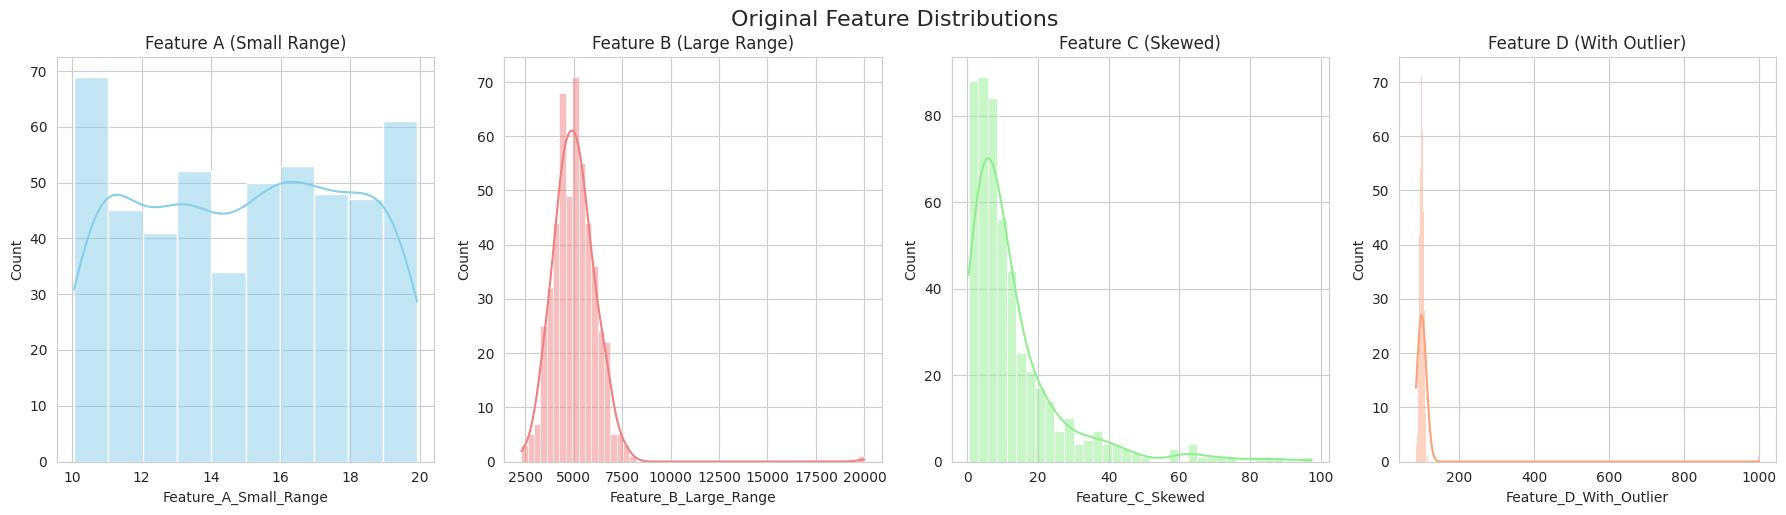

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
np.random.seed(42) # for reproducibility

print("Libraries loaded successfully for Feature Scaling!")

# Create a synthetic dataset with features on different scales and some outliers
def create_scaling_dataset(num_samples=1000):
    data = {
        'Feature_A_Small_Range': np.random.uniform(10, 20, num_samples), # Small range
        'Feature_B_Large_Range': np.random.normal(5000, 1000, num_samples), # Large range
        'Feature_C_Skewed': np.random.lognormal(mean=2, sigma=1, size=num_samples), # Skewed, positive values
        'Feature_D_With_Outlier': np.random.normal(100, 5, num_samples) # Most data around 100
    }
    df = pd.DataFrame(data)

    # Add a significant outlier to Feature_D_With_Outlier
    df.loc[np.random.randint(0, num_samples), 'Feature_D_With_Outlier'] = 1000
    df.loc[np.random.randint(0, num_samples), 'Feature_B_Large_Range'] = 20000

    return df

df_scaling = create_scaling_dataset(num_samples=500)

print("Original DataFrame Head:")
print(df_scaling.head())
print("\nOriginal DataFrame Describe:")
print(df_scaling.describe())

# Visualize the original distributions
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
sns.histplot(df_scaling['Feature_A_Small_Range'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Feature A (Small Range)')
sns.histplot(df_scaling['Feature_B_Large_Range'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Feature B (Large Range)')
sns.histplot(df_scaling['Feature_C_Skewed'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Feature C (Skewed)')
sns.histplot(df_scaling['Feature_D_With_Outlier'], kde=True, ax=axes[3], color='lightsalmon')
axes[3].set_title('Feature D (With Outlier)')
plt.tight_layout()
plt.suptitle('Original Feature Distributions', y=1.02, fontsize=16)
plt.show()

#### **A. Min-Max Scaling (Normalization) Demonstration**

We'll scale the data to a range of [0, 1].


--- Min-Max Scaling (Normalization) Demonstration ---

DataFrame after Min-Max Scaling (Head):
   Feature_A_Small_Range  Feature_B_Large_Range  Feature_C_Skewed  \
0               0.374003               0.171705          0.132275   
1               0.957232               0.258410          0.048937   
2               0.735834               0.206099          0.133196   
3               0.600865               0.119794          0.226456   
4               0.152806               0.101626          0.168698   

   Feature_D_With_Outlier  
0                0.023087  
1                0.024507  
2                0.016145  
3                0.011852  
4                0.018485  

DataFrame after Min-Max Scaling (Describe):
       Feature_A_Small_Range  Feature_B_Large_Range  Feature_C_Skewed  \
count             500.000000             500.000000        500.000000   
mean                0.499543               0.154618          0.127173   
std                 0.302346               0.068326      

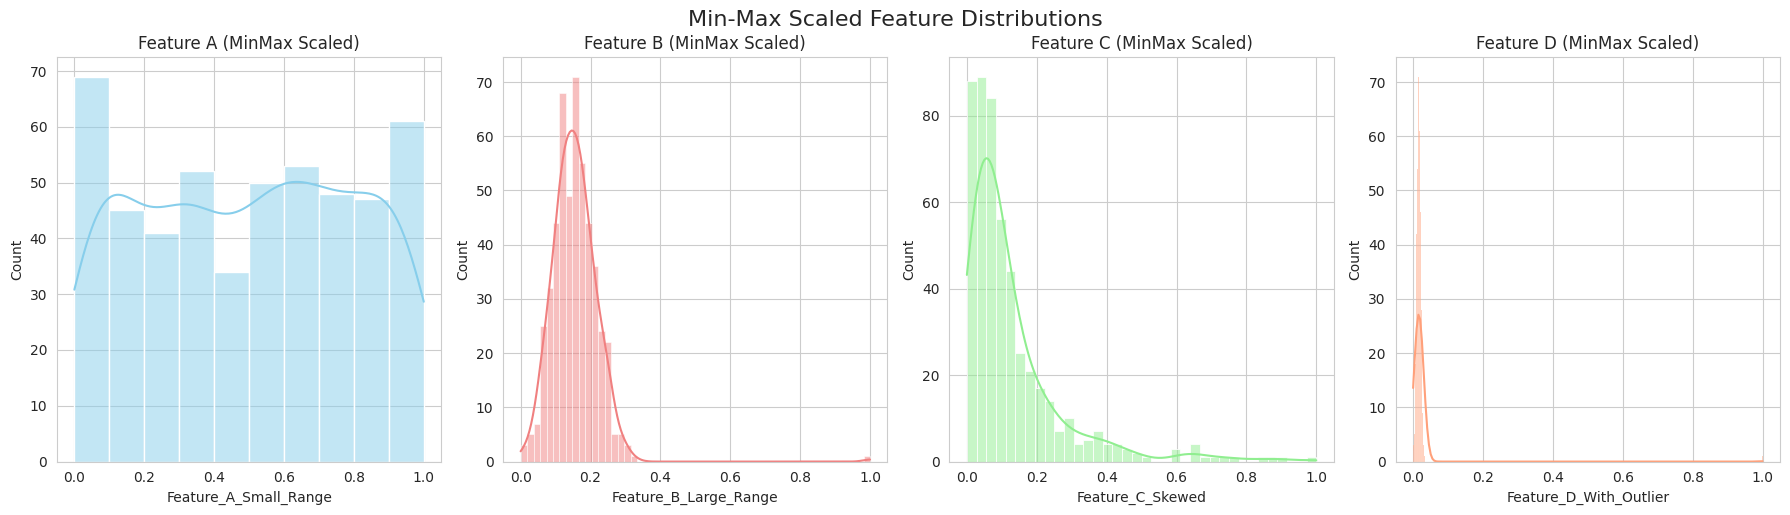


Impact of outlier on Feature_D_With_Outlier after Min-Max Scaling:
Original values around 100 are now compressed close to 0.1 after scaling to [0,1].
0    0.023087
1    0.024507
2    0.016145
3    0.011852
4    0.018485
Name: Feature_D_With_Outlier, dtype: float64


In [2]:
print("\n--- Min-Max Scaling (Normalization) Demonstration ---")

# Apply Min-Max Scaling
scaler_minmax = MinMaxScaler()

# Important: Fit on the entire DataFrame's numerical columns if no train/test split yet
# For demo purposes, we will scale the whole dataframe first, but emphasize train/test split later.
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df_scaling), columns=df_scaling.columns)

print("\nDataFrame after Min-Max Scaling (Head):")
print(df_minmax_scaled.head())
print("\nDataFrame after Min-Max Scaling (Describe):")
print(df_minmax_scaled.describe()) # All min=0, max=1

# Visualize the scaled distributions
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
sns.histplot(df_minmax_scaled['Feature_A_Small_Range'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Feature A (MinMax Scaled)')
sns.histplot(df_minmax_scaled['Feature_B_Large_Range'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Feature B (MinMax Scaled)')
sns.histplot(df_minmax_scaled['Feature_C_Skewed'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Feature C (MinMax Scaled)')
sns.histplot(df_minmax_scaled['Feature_D_With_Outlier'], kde=True, ax=axes[3], color='lightsalmon')
axes[3].set_title('Feature D (MinMax Scaled)')
plt.tight_layout()
plt.suptitle('Min-Max Scaled Feature Distributions', y=1.02, fontsize=16)
plt.show()

# Observe the effect of outlier on 'Feature_D_With_Outlier'
# The outlier value 1000 makes most other values (around 100) very close to 0 after scaling.
print("\nImpact of outlier on Feature_D_With_Outlier after Min-Max Scaling:")
print(f"Original values around 100 are now compressed close to 0.1 after scaling to [0,1].")
print(df_minmax_scaled['Feature_D_With_Outlier'].head())

#### **B. Standardization (Z-score Normalization) Demonstration**

We'll scale the data to have mean 0 and standard deviation 1.


--- Standardization (Z-score Normalization) Demonstration ---

DataFrame after Standardization (Head):
   Feature_A_Small_Range  Feature_B_Large_Range  Feature_C_Skewed  \
0              -0.415636               0.250331          0.034748   
1               1.515310               1.520604         -0.532887   
2               0.782307               0.754220          0.041022   
3               0.335457              -0.510186          0.676240   
4              -1.147973              -0.776351          0.282833   

   Feature_D_With_Outlier  
0                0.107385  
1                0.139459  
2               -0.049392  
3               -0.146369  
4                0.003450  

DataFrame after Standardization (Describe):
       Feature_A_Small_Range  Feature_B_Large_Range  Feature_C_Skewed  \
count                 500.00                 500.00            500.00   
mean                   -0.00                  -0.00              0.00   
std                     1.00                   1.

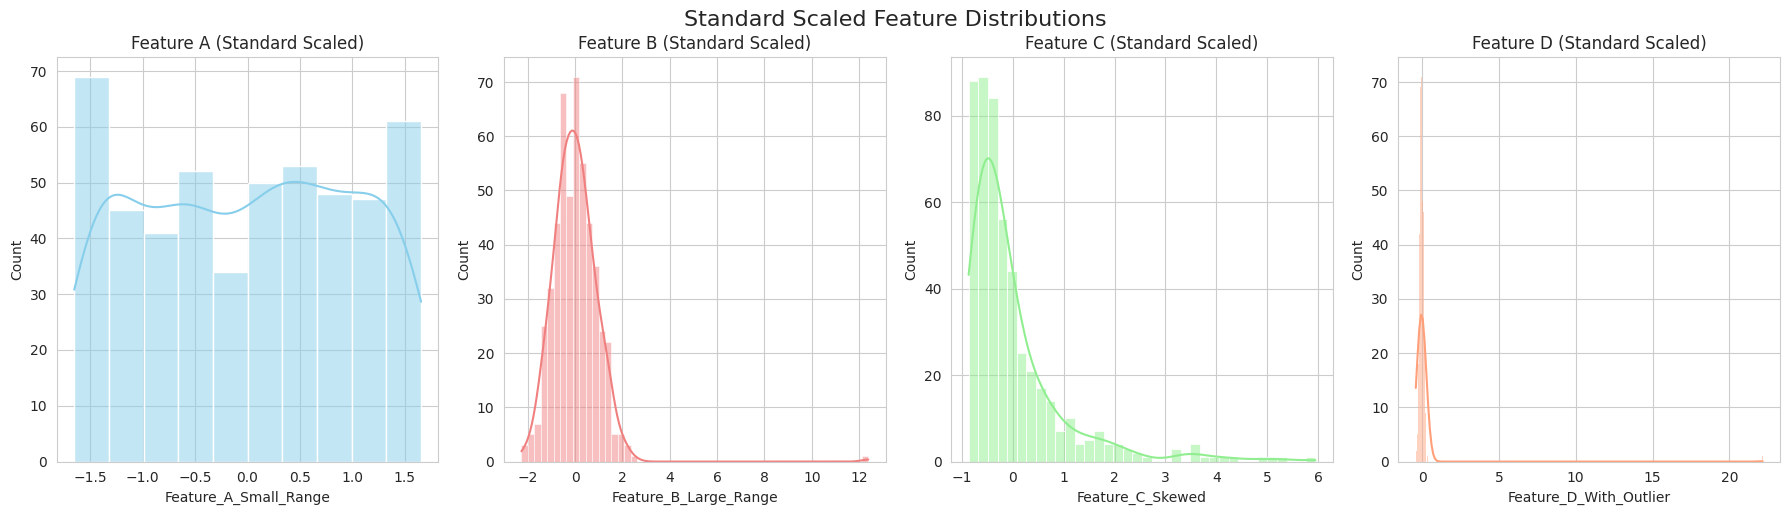


Impact of outlier on Feature_D_With_Outlier after Standardization:
Original values around 100 are transformed, and the outlier is still far from the mean.
0    0.107385
1    0.139459
2   -0.049392
3   -0.146369
4    0.003450
Name: Feature_D_With_Outlier, dtype: float64


In [3]:
print("\n--- Standardization (Z-score Normalization) Demonstration ---")

# Apply Standardization
scaler_standard = StandardScaler()

df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df_scaling), columns=df_scaling.columns)

print("\nDataFrame after Standardization (Head):")
print(df_standard_scaled.head())
print("\nDataFrame after Standardization (Describe):")
print(df_standard_scaled.describe().round(2)) # Mean ~0, Std ~1

# Visualize the scaled distributions
fig, axes = plt.subplots(1, 4, figsize=(18, 5))
sns.histplot(df_standard_scaled['Feature_A_Small_Range'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Feature A (Standard Scaled)')
sns.histplot(df_standard_scaled['Feature_B_Large_Range'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Feature B (Standard Scaled)')
sns.histplot(df_standard_scaled['Feature_C_Skewed'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Feature C (Standard Scaled)')
sns.histplot(df_standard_scaled['Feature_D_With_Outlier'], kde=True, ax=axes[3], color='lightsalmon')
axes[3].set_title('Feature D (Standard Scaled)')
plt.tight_layout()
plt.suptitle('Standard Scaled Feature Distributions', y=1.02, fontsize=16)
plt.show()

# Observe the effect of outlier on 'Feature_D_With_Outlier'
# The outlier is still extreme, but the rest of the data is not as compressed as with Min-Max.
print("\nImpact of outlier on Feature_D_With_Outlier after Standardization:")
print(f"Original values around 100 are transformed, and the outlier is still far from the mean.")
print(df_standard_scaled['Feature_D_With_Outlier'].head())

#### **C. The Golden Rule in Practice: Fit on Train, Transform Both**

This is how scaling should be properly integrated into a machine learning workflow.


--- The Golden Rule in Practice: Fit on Train, Transform Both ---

Original X_train describe (Feature_D_With_Outlier):
count     350.00
mean      102.67
std        48.36
min        86.39
25%        96.93
50%       100.13
75%       103.67
max      1000.00
Name: Feature_D_With_Outlier, dtype: float64

Original X_test describe (Feature_D_With_Outlier):
count    150.00
mean      99.86
std        5.02
min       86.86
25%       96.04
50%      100.02
75%      103.92
max      112.22
Name: Feature_D_With_Outlier, dtype: float64

--- After Applying Golden Rule Scaling ---

X_train_scaled_gr describe (Feature_D_With_Outlier):
count    350.00
mean      -0.00
std        1.00
min       -0.34
25%       -0.12
50%       -0.05
75%        0.02
max       18.58
Name: Feature_D_With_Outlier, dtype: float64

X_test_scaled_gr describe (Feature_D_With_Outlier):
count    150.00
mean      -0.06
std        0.10
min       -0.33
25%       -0.14
50%       -0.05
75%        0.03
max        0.20
Name: Feature_D_With_O

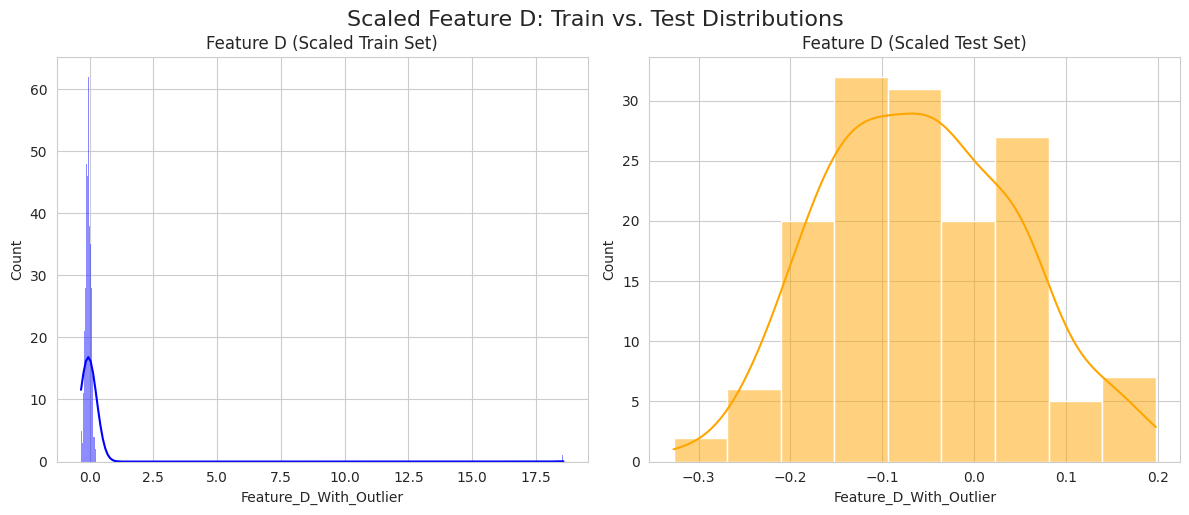

In [4]:
print("\n--- The Golden Rule in Practice: Fit on Train, Transform Both ---")

# Re-create fresh data for this section to ensure no prior scaling affects it
df_golden_rule = create_scaling_dataset(num_samples=500)

# 1. Split data into training and testing sets
X_train, X_test = train_test_split(df_golden_rule, test_size=0.3, random_state=42)

print(f"\nOriginal X_train describe (Feature_D_With_Outlier):\n{X_train['Feature_D_With_Outlier'].describe().round(2)}")
print(f"\nOriginal X_test describe (Feature_D_With_Outlier):\n{X_test['Feature_D_With_Outlier'].describe().round(2)}")

# 2. Instantiate the scaler (StandardScaler is common)
scaler_gr = StandardScaler()

# 3. Fit the scaler ONLY on the training data
scaler_gr.fit(X_train) # The scaler learns the mean and std dev from X_train

# 4. Transform both the training and test data using the FITTED scaler
X_train_scaled_gr = pd.DataFrame(scaler_gr.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled_gr = pd.DataFrame(scaler_gr.transform(X_test), columns=X_test.columns, index=X_test.index)

print("\n--- After Applying Golden Rule Scaling ---")
print("\nX_train_scaled_gr describe (Feature_D_With_Outlier):")
print(X_train_scaled_gr['Feature_D_With_Outlier'].describe().round(2)) # Mean ~0, Std ~1 for train set

print("\nX_test_scaled_gr describe (Feature_D_With_Outlier):")
print(X_test_scaled_gr['Feature_D_With_Outlier'].describe().round(2)) # Test set mean/std won't be exactly 0/1, as it uses train params

# Verify that the min/max or mean/std are derived from training data
print(f"\nScaler's learned mean (for Feature_D_With_Outlier): {scaler_gr.mean_[X_train.columns.get_loc('Feature_D_With_Outlier')]:.2f}")
print(f"Scaler's learned std (for Feature_D_With_Outlier): {scaler_gr.scale_[X_train.columns.get_loc('Feature_D_With_Outlier')]:.2f}")

# Compare to actual mean/std of test set before scaling
test_mean_orig = df_golden_rule['Feature_D_With_Outlier'].mean()
test_std_orig = df_golden_rule['Feature_D_With_Outlier'].std()
print(f"\nOriginal whole dataset mean (Feature_D_With_Outlier): {test_mean_orig:.2f}")
print(f"Original whole dataset std (Feature_D_With_Outlier): {test_std_orig:.2f}")

# Example of how to see a difference if test set had a unique outlier not in train
# (Not always obvious with random data, but principle is key)
# If a new extreme value appears ONLY in the test set, it will be scaled relative to
# the training set's mean/std, potentially resulting in a very large (or small) scaled value.

# Visualize distributions of a scaled feature from train vs test
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(X_train_scaled_gr['Feature_D_With_Outlier'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Feature D (Scaled Train Set)')
sns.histplot(X_test_scaled_gr['Feature_D_With_Outlier'], kde=True, ax=axes[1], color='orange')
axes[1].set_title('Feature D (Scaled Test Set)')
plt.tight_layout()
plt.suptitle('Scaled Feature D: Train vs. Test Distributions', y=1.02, fontsize=16)
plt.show()

#### **Exercises & Practice (for Colab)**

**Exercise 7.3.1: E-commerce Customer Spend Analysis (Mixed Scaling)**

You have a dataset of e-commerce customer data. Some features are skewed, and some might benefit from a fixed range.

Create a DataFrame with 100 entries and the following numerical columns:

  * `Total_Orders`: `np.random.poisson(5, num_customers)` (count data, potentially skewed)
  * `Avg_Item_Value`: `np.random.normal(30, 10, num_customers)` (continuous, might have mild outliers)
  * `Loyalty_Score`: `np.random.uniform(0, 100, num_customers)` (continuous, naturally bounded 0-100)

Perform the following scaling:

1.  Split the data into training (70%) and testing (30%) sets.
2.  Apply **Min-Max Scaling** to `Loyalty_Score` (because it's naturally bounded and you want to preserve that relative position within 0-1).
3.  Apply **Standardization** to `Total_Orders` and `Avg_Item_Value`.
4.  Ensure you follow the "Fit on Train, Transform Both" rule.
5.  Print the `describe()` statistics for the scaled training and test sets.


## 7.4 Handling Imbalanced Datasets

#### **7.4.1 What is an Imbalanced Dataset?**

An imbalanced dataset is a classification dataset where the distribution of examples across the known classes is skewed or biased. This means that the number of instances belonging to one class (the **majority class**) is significantly higher than the number of instances belonging to another class (the **minority class**).

  * **Examples:**

      * **Fraud Detection:** Very few transactions are fraudulent (minority class) compared to legitimate ones (majority class). (e.g., 0.1% fraud)
      * **Disease Prediction:** A small percentage of patients have a rare disease (minority class) compared to healthy individuals.
      * **Customer Churn:** A small fraction of customers churn (minority class) while most remain active.
      * **Spam Detection:** A vast majority of emails are legitimate (majority class) compared to spam (minority class).

  * **Why is it a problem?**

      * **Model Bias:** Standard machine learning algorithms are often designed to minimize overall error rate. In an imbalanced dataset, simply predicting the majority class for all instances can yield a high accuracy. For example, if 99% of transactions are legitimate, a model predicting "legitimate" for all transactions achieves 99% accuracy but fails to detect any fraud.
      * **Poor Minority Class Performance:** The model learns very little about the minority class due to its limited representation. This often leads to poor recall and precision for the minority class, which is usually the class of most interest (e.g., detecting fraud, identifying disease).
      * **Misleading Metrics:** Accuracy becomes an unreliable metric. Other metrics like Precision, Recall, F1-score, and AUC-ROC are more appropriate.

-----

#### **7.4.2 Metrics for Imbalanced Datasets**

Since accuracy can be misleading, specific metrics are crucial:

  * **Confusion Matrix:** A table that summarizes the performance of a classification model on a set of test data, showing the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

    |                   | Predicted Positive | Predicted Negative |
    | :---------------- | :----------------- | :----------------- |
    | **Actual Positive** | True Positive (TP) | False Negative (FN) |
    | **Actual Negative** | False Positive (FP) | True Negative (TN) |

  * **Precision:** Of all predicted positive instances, how many were actually positive?
    $Precision = \\frac{TP}{TP + FP}$

      * High precision means fewer false positives (e.g., few legitimate transactions flagged as fraud).

  * **Recall (Sensitivity/True Positive Rate):** Of all actual positive instances, how many were correctly identified?
    $Recall = \\frac{TP}{TP + FN}$

      * High recall means fewer false negatives (e.g., few fraudulent transactions missed).

  * **F1-Score:** The harmonic mean of Precision and Recall. It's a balanced metric, useful when you need a balance between precision and recall.
    $F1 = 2 \\times \\frac{Precision \\times Recall}{Precision + Recall}$

  * **Specificity (True Negative Rate):** Of all actual negative instances, how many were correctly identified?
    $Specificity = \\frac{TN}{TN + FP}$

  * **Area Under the Receiver Operating Characteristic Curve (AUC-ROC):**

      * A curve plotted with True Positive Rate (Recall) on the y-axis and False Positive Rate (1 - Specificity) on the x-axis at various threshold settings.
      * **AUC** (Area Under the Curve) measures the entire 2-D area underneath the ROC curve. It provides an aggregate measure of performance across all possible classification thresholds.
      * A perfect classifier has an AUC of 1.0. A purely random classifier has an AUC of 0.5.
      * **Interpretation:** A higher AUC indicates that the model is better at distinguishing between the positive and negative classes. It's a robust metric for imbalanced datasets because it considers all classification thresholds and is insensitive to class distribution.

-----

#### **7.4.3 Strategies for Handling Imbalanced Data**

The primary strategies fall into two categories:

**A. Resampling Techniques:**
These techniques involve modifying the training dataset to change the class distribution.

**A.1. Undersampling (Reducing Majority Class):**

  * **Concept:** Randomly removes instances from the majority class to balance the dataset.
  * **Pros:** Can help with training speed for very large datasets.
  * **Cons:** **Risk of losing valuable information** from the majority class, potentially leading to underfitting.
  * **Methods:**
      * **Random Undersampling:** Randomly deletes instances from the majority class. (Simplest)
      * **NearMiss:** Selects samples from the majority class based on their distance to minority class samples. Aims to keep samples that are "hard" to classify.
      * **Tomek Links:** Identifies pairs of minority and majority class instances that are very close to each other but belong to different classes (forming a "link"). The majority class instance in the link is removed.

**A.2. Oversampling (Increasing Minority Class):**

  * **Concept:** Duplicates or synthesizes new instances of the minority class.
  * **Pros:** No loss of information.
  * **Cons:**
      * **Random Oversampling:** Simply duplicates existing minority class samples. Can lead to overfitting, as the model sees the same samples multiple times.
      * **SMOTE (Synthetic Minority Over-sampling Technique):** Creates synthetic minority class samples. It selects a minority class instance and then finds its k-nearest neighbors. New synthetic instances are created at a random point along the line segments connecting the selected instance to its neighbors.
          * **Pros:** Reduces overfitting compared to random oversampling.
          * **Cons:** Can create "noise" if the minority class is very scattered. Doesn't consider decision boundaries.
      * **ADASYN (Adaptive Synthetic Sampling):** Similar to SMOTE but focuses on generating synthetic samples for minority class instances that are harder to learn (i.e., those instances whose k-nearest neighbors are mostly from the majority class).
          * **Pros:** Adaptively generates more samples for "difficult" minority samples.
          * **Cons:** Can be sensitive to noise.

**A.3. Combined Sampling:**

  * **Concept:** Uses both oversampling and undersampling techniques.
  * **Example:** **SMOTE + Tomek Links** (oversample minority, then clean up majority close to minority). **SMOTE + ENN (Edited Nearest Neighbors)** (oversample, then remove samples that are misclassified by their neighbors).
  * **Pros:** Aims to combine the benefits of both approaches, often leading to better performance.

**B. Algorithm-Level Approaches:**
These techniques involve adjusting the learning algorithm itself to give more importance to the minority class.

1.  **Class Weighting:**

      * **Concept:** Assigns a higher penalty to misclassifications of the minority class. This makes the model "pay more attention" to correctly classifying the minority class.
      * **Implementation:** Many `scikit-learn` classifiers (e.g., `LogisticRegression`, `SVC`, `RandomForestClassifier`, `GradientBoostingClassifier`) have a `class_weight` parameter (e.g., `class_weight='balanced'` or custom dictionary).
      * **Pros:** Simple to implement, no changes to the dataset size.
      * **Cons:** Requires experimentation to find optimal weights.

2.  **Algorithm-Specific Methods:**

      * Some algorithms are inherently better at handling imbalance (e.g., tree-based models can sometimes implicitly handle it).
      * Ensemble methods like **Bagging** can sometimes perform well, as each base learner may get a different balanced subset.
      * **Cost-Sensitive Learning:** Directly incorporates misclassification costs (e.g., false negative costs more than false positive) into the model's objective function.

**C. Other Strategies:**

1.  **Generate More Data:** If feasible, collecting more data for the minority class is often the best solution.
2.  **Change of Perspective:** Sometimes, an imbalanced classification problem can be reframed as an anomaly detection problem (e.g., fraud detection).
3.  **Threshold Moving:** After training, you can adjust the classification threshold (default is usually 0.5) to optimize for a specific metric (e.g., higher recall for minority class).

-----

#### **7.4.4 The Golden Rule for Imbalanced Data Handling: Apply Only on Training Data**

Just like scaling, resampling (undersampling/oversampling) techniques **must only be applied to the training dataset**.

  * **Why?** If you apply resampling to the entire dataset (before splitting), you introduce synthetic samples (from oversampling) or remove real samples (from undersampling) from your test set. This will lead to an unrealistic evaluation of your model's performance on unseen data.
  * **Correct Approach:**
    1.  **Split Data:** Divide your dataset into training and testing sets *first*.
    2.  **Apply Resampling:** Apply undersampling, oversampling, or combined sampling *only* to the **training data** (`X_train`, `y_train`).
    3.  **Train Model:** Train your model on the resampled training data.
    4.  **Evaluate Model:** Evaluate your model on the *original, untouched* test data (`X_test`, `y_test`).



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Install imbalanced-learn if you haven't already
# !pip install imbalanced-learn

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline # Use imblearn's pipeline for resampling steps

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
np.random.seed(42) # for reproducibility

print("Libraries loaded successfully for Handling Imbalanced Datasets!")

# Create an imbalanced synthetic dataset
def create_imbalanced_dataset(n_samples=1000, n_features=5, imbalance_ratio=0.05):
    X = np.random.randn(n_samples, n_features)
    y_major_count = int(n_samples * (1 - imbalance_ratio))
    y_minor_count = n_samples - y_major_count

    # Create a simple rule for minority class based on one feature
    y = np.zeros(n_samples, dtype=int)
    # Make a small portion of samples with Feature 0 > 1.5 the minority class
    minority_indices = np.where(X[:, 0] > 1.5)[0]
    if len(minority_indices) >= y_minor_count:
        y[np.random.choice(minority_indices, y_minor_count, replace=False)] = 1
    else: # If not enough "natural" minority samples, randomly assign some
        y[np.random.choice(n_samples, y_minor_count, replace=False)] = 1

    # Ensure exact imbalance ratio
    current_minority_count = np.sum(y == 1)
    if current_minority_count > y_minor_count:
        # Trim excess minority samples
        extra_minority_indices = np.where(y == 1)[0]
        y[np.random.choice(extra_minority_indices, current_minority_count - y_minor_count, replace=False)] = 0
    elif current_minority_count < y_minor_count:
        # Add more minority samples
        majority_indices = np.where(y == 0)[0]
        y[np.random.choice(majority_indices, y_minor_count - current_minority_count, replace=False)] = 1

    df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])
    df['target'] = y
    return df

df_imbalanced = create_imbalanced_dataset(n_samples=1000, n_features=10, imbalance_ratio=0.08) # 8% minority class

print("Original Imbalanced Dataset Head:")
print(df_imbalanced.head())
print("\nTarget Class Distribution:")
print(df_imbalanced['target'].value_counts())
print(f"Minority Class Percentage: {df_imbalanced['target'].value_counts(normalize=True)[1]:.2%}")

# Split data into training and testing sets (stratified to maintain imbalance ratio)
X = df_imbalanced.drop('target', axis=1)
y = df_imbalanced['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nTrain set minority count: {y_train.value_counts()[1]}")
print(f"Test set minority count: {y_test.value_counts()[1]}")

Libraries loaded successfully for Handling Imbalanced Datasets!
Original Imbalanced Dataset Head:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1  -0.463418  -0.465730   0.241962  -1.913280  -1.724918  -0.562288   
2   1.465649  -0.225776   0.067528  -1.424748  -0.544383   0.110923   
3  -0.601707   1.852278  -0.013497  -1.057711   0.822545  -1.220844   
4   0.738467   0.171368  -0.115648  -0.301104  -1.478522  -0.719844   

   feature_6  feature_7  feature_8  feature_9  target  
0   1.579213   0.767435  -0.469474   0.542560       0  
1  -1.012831   0.314247  -0.908024  -1.412304       0  
2  -1.150994   0.375698  -0.600639  -0.291694       0  
3   0.208864  -1.959670  -1.328186   0.196861       0  
4  -0.460639   1.057122   0.343618  -1.763040       0  

Target Class Distribution:
target
0    920
1     80
Name: count, dtype: int64
Minority Class Percentage: 8.00%

Train set minority count: 

#### **A. Baseline Model Performance (No Handling)**

First, let's train a simple Logistic Regression model without any imbalance handling and evaluate its performance.


--- Baseline Model Performance (No Handling) ---

Classification Report (Baseline):
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       276
           1       0.00      0.00      0.00        24

    accuracy                           0.92       300
   macro avg       0.46      0.50      0.48       300
weighted avg       0.85      0.92      0.88       300


Confusion Matrix (Baseline):
[[276   0]
 [ 24   0]]

ROC AUC Score (Baseline): 0.5072


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


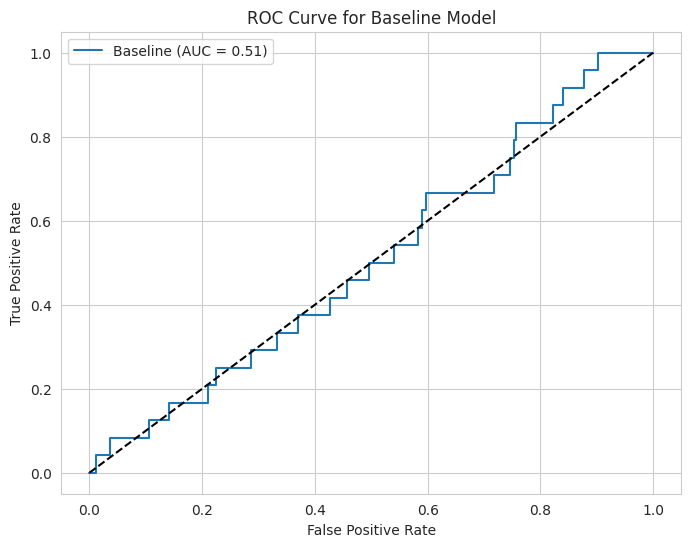

In [6]:
print("\n--- Baseline Model Performance (No Handling) ---")

# Preprocessing pipeline (just scaling numerical features)
numerical_features = X_train.columns.tolist() # All features are numerical here
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features)
    ])

# Model pipeline without resampling
baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Train the baseline model
baseline_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_baseline = baseline_pipeline.predict(X_test)
y_prob_baseline = baseline_pipeline.predict_proba(X_test)[:, 1] # Probability of positive class

# Evaluate
print("\nClassification Report (Baseline):")
print(classification_report(y_test, y_pred_baseline))

conf_matrix_baseline = confusion_matrix(y_test, y_pred_baseline)
print("\nConfusion Matrix (Baseline):")
print(conf_matrix_baseline)

roc_auc_baseline = roc_auc_score(y_test, y_prob_baseline)
print(f"\nROC AUC Score (Baseline): {roc_auc_baseline:.4f}")

# Plot ROC curve for baseline
fpr_baseline, tpr_baseline, _ = roc_curve(y_test, y_prob_baseline)
plt.figure(figsize=(8, 6))
plt.plot(fpr_baseline, tpr_baseline, label=f'Baseline (AUC = {roc_auc_baseline:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Baseline Model')
plt.legend()
plt.show()

* **Observation:** Notice the low Recall for class 1 (minority class). The model struggles to identify positive cases. Accuracy might look good if the imbalance is severe, but the important metric (minority class recall/F1) will be poor.

-----

#### **B. Resampling Techniques with `imbalanced-learn`**

We'll demonstrate a few common resampling methods. Remember, these are applied ONLY to the training data.


--- Resampling Techniques ---

--- Method: Random Oversampling ---

Classification Report (Random Oversampling):
              precision    recall  f1-score   support

           0       0.91      0.57      0.70       276
           1       0.07      0.38      0.12        24

    accuracy                           0.55       300
   macro avg       0.49      0.47      0.41       300
weighted avg       0.84      0.55      0.65       300


Confusion Matrix (Random Oversampling):
[[156 120]
 [ 15   9]]

ROC AUC Score (Random Oversampling): 0.4630

--- Method: SMOTE ---

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.92      0.59      0.72       276
           1       0.07      0.38      0.12        24

    accuracy                           0.58       300
   macro avg       0.50      0.48      0.42       300
weighted avg       0.85      0.58      0.67       300


Confusion Matrix (SMOTE):
[[164 112]
 [ 15   9]]

ROC AUC Score (SM

/tmp/ipython-input-7-2994177283.py:72: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray', linewidth=0.7)


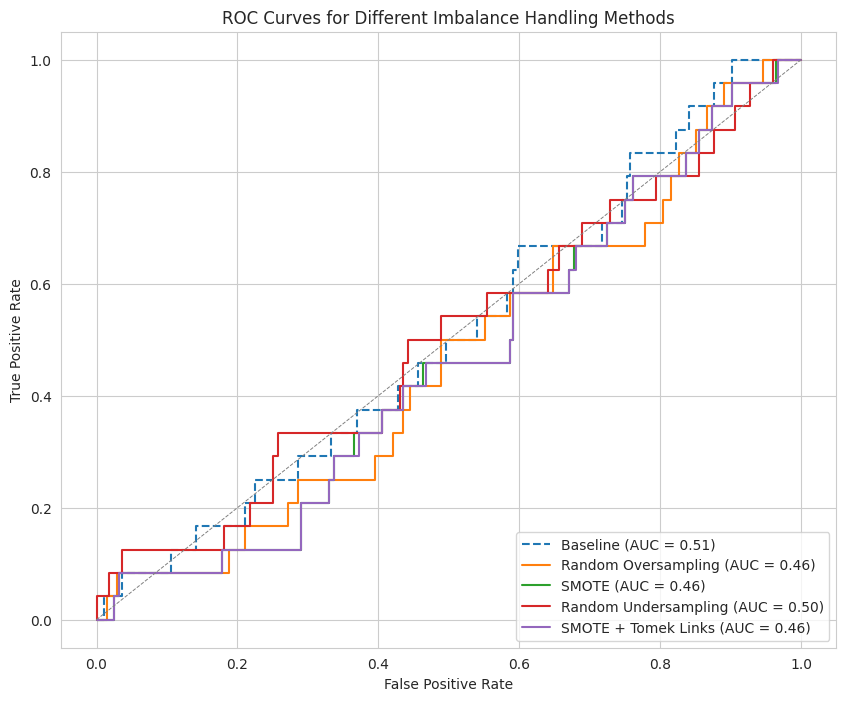

In [7]:
print("\n--- Resampling Techniques ---")

# Define the base classifier and preprocessor
classifier = LogisticRegression(random_state=42, solver='liblinear')
# preprocessor is already defined above

# Helper function to train and evaluate a model with a given sampler
def train_and_evaluate(sampler, X_train, y_train, X_test, y_test, method_name):
    print(f"\n--- Method: {method_name} ---")

    # Create an imblearn pipeline for resampling + classification
    # The preprocessor is the first step, then the sampler, then the classifier
    pipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('sampler', sampler),
        ('classifier', classifier)
    ])

    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]

    # Evaluate
    print(f"\nClassification Report ({method_name}):")
    print(classification_report(y_test, y_pred))
    print(f"\nConfusion Matrix ({method_name}):")
    print(confusion_matrix(y_test, y_pred))
    print(f"\nROC AUC Score ({method_name}): {roc_auc_score(y_test, y_prob):.4f}")

    return y_pred, y_prob

# --- 1. Random Oversampling ---
# Increase minority class by simply duplicating samples
sampler_ros = RandomOverSampler(random_state=42)
y_pred_ros, y_prob_ros = train_and_evaluate(sampler_ros, X_train, y_train, X_test, y_test, "Random Oversampling")

# --- 2. SMOTE (Synthetic Minority Over-sampling Technique) ---
# Create synthetic samples of the minority class
sampler_smote = SMOTE(random_state=42)
y_pred_smote, y_prob_smote = train_and_evaluate(sampler_smote, X_train, y_train, X_test, y_test, "SMOTE")

# --- 3. Random Undersampling ---
# Decrease majority class by randomly removing samples
sampler_rus = RandomUnderSampler(random_state=42)
y_pred_rus, y_prob_rus = train_and_evaluate(sampler_rus, X_train, y_train, X_test, y_test, "Random Undersampling")

# --- 4. SMOTE + Tomek Links (Combined Sampling) ---
# Oversample, then clean up majority class near minority class boundaries
sampler_smote_tomek = SMOTETomek(random_state=42)
y_pred_smt, y_prob_smt = train_and_evaluate(sampler_smote_tomek, X_train, y_train, X_test, y_test, "SMOTE + Tomek Links")

# Plot all ROC curves for comparison
plt.figure(figsize=(10, 8))
plt.plot(fpr_baseline, tpr_baseline, label=f'Baseline (AUC = {roc_auc_baseline:.2f})', linestyle='--')

fpr_ros, tpr_ros, _ = roc_curve(y_test, y_prob_ros)
plt.plot(fpr_ros, tpr_ros, label=f'Random Oversampling (AUC = {roc_auc_score(y_test, y_prob_ros):.2f})')

fpr_smote, tpr_smote, _ = roc_curve(y_test, y_prob_smote)
plt.plot(fpr_smote, tpr_smote, label=f'SMOTE (AUC = {roc_auc_score(y_test, y_prob_smote):.2f})')

fpr_rus, tpr_rus, _ = roc_curve(y_test, y_prob_rus)
plt.plot(fpr_rus, tpr_rus, label=f'Random Undersampling (AUC = {roc_auc_score(y_test, y_prob_rus):.2f})')

fpr_smt, tpr_smt, _ = roc_curve(y_test, y_prob_smt)
plt.plot(fpr_smt, tpr_smt, label=f'SMOTE + Tomek Links (AUC = {roc_auc_score(y_test, y_prob_smt):.2f})')


plt.plot([0, 1], [0, 1], 'k--', color='gray', linewidth=0.7)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Imbalance Handling Methods')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#### **C. Class Weighting**

We can adjust the `class_weight` parameter directly in the classifier. This is often a good first approach.


--- Class Weighting Demonstration ---

Classification Report (Class Weighted):
              precision    recall  f1-score   support

           0       0.91      0.58      0.71       276
           1       0.07      0.38      0.12        24

    accuracy                           0.56       300
   macro avg       0.49      0.48      0.41       300
weighted avg       0.85      0.56      0.66       300


Confusion Matrix (Class Weighted):
[[159 117]
 [ 15   9]]

ROC AUC Score (Class Weighted): 0.4928


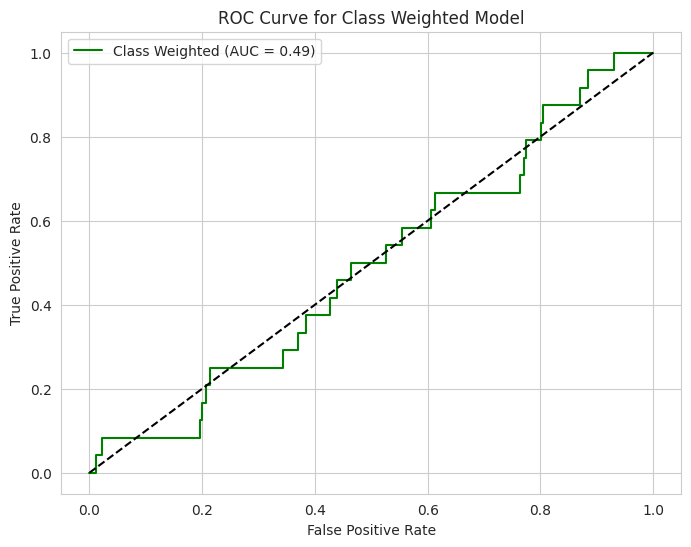


Custom Class Weights: {0: np.float64(0.5434782608695652), 1: np.float64(6.25)}

Classification Report (Custom Class Weighted):
              precision    recall  f1-score   support

           0       0.91      0.58      0.71       276
           1       0.07      0.38      0.12        24

    accuracy                           0.56       300
   macro avg       0.49      0.48      0.41       300
weighted avg       0.85      0.56      0.66       300


ROC AUC Score (Custom Class Weighted): 0.4928


In [8]:
print("\n--- Class Weighting Demonstration ---")

# Classifier with balanced class weights
classifier_weighted = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')

# Model pipeline with class weights
weighted_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier_weighted)
])

# Train the weighted model
weighted_pipeline.fit(X_train, y_train)

# Make predictions
y_pred_weighted = weighted_pipeline.predict(X_test)
y_prob_weighted = weighted_pipeline.predict_proba(X_test)[:, 1]

# Evaluate
print("\nClassification Report (Class Weighted):")
print(classification_report(y_test, y_pred_weighted))

print("\nConfusion Matrix (Class Weighted):")
print(confusion_matrix(y_test, y_pred_weighted))

roc_auc_weighted = roc_auc_score(y_test, y_prob_weighted)
print(f"\nROC AUC Score (Class Weighted): {roc_auc_weighted:.4f}")

# Plot ROC curve for weighted model
fpr_weighted, tpr_weighted, _ = roc_curve(y_test, y_prob_weighted)
plt.figure(figsize=(8, 6))
plt.plot(fpr_weighted, tpr_weighted, label=f'Class Weighted (AUC = {roc_auc_weighted:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class Weighted Model')
plt.legend()
plt.show()

# Demonstrate custom class weights
# Calculate inverse of class frequencies to use as weights
# This gives more weight to the minority class
class_counts = y_train.value_counts()
total_samples = len(y_train)
class_weights_dict = {
    0: total_samples / (2 * class_counts[0]), # weight for majority class
    1: total_samples / (2 * class_counts[1])  # weight for minority class
}
print(f"\nCustom Class Weights: {class_weights_dict}")

classifier_custom_weighted = LogisticRegression(random_state=42, solver='liblinear', class_weight=class_weights_dict)

custom_weighted_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier_custom_weighted)
])
custom_weighted_pipeline.fit(X_train, y_train)
y_pred_custom_weighted = custom_weighted_pipeline.predict(X_test)
y_prob_custom_weighted = custom_weighted_pipeline.predict_proba(X_test)[:, 1]

print("\nClassification Report (Custom Class Weighted):")
print(classification_report(y_test, y_pred_custom_weighted))
print(f"\nROC AUC Score (Custom Class Weighted): {roc_auc_score(y_test, y_prob_custom_weighted):.4f}")

#### **D. Ensemble Methods (e.g., BalancedBaggingClassifier)**

`imbalanced-learn` also offers ensemble methods specifically designed for imbalanced data.


--- Ensemble Methods for Imbalance ---

Classification Report (BalancedBaggingClassifier):
              precision    recall  f1-score   support

           0       0.90      0.74      0.82       276
           1       0.03      0.08      0.04        24

    accuracy                           0.69       300
   macro avg       0.47      0.41      0.43       300
weighted avg       0.83      0.69      0.75       300


Confusion Matrix (BalancedBaggingClassifier):
[[205  71]
 [ 22   2]]

ROC AUC Score (BalancedBaggingClassifier): 0.4922


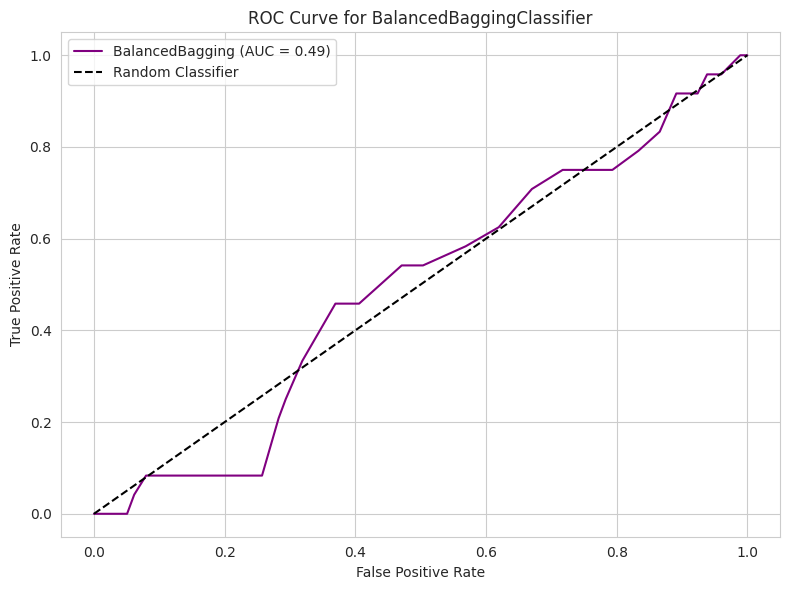

In [10]:
print("\n--- Ensemble Methods for Imbalance ---")

from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define the pipeline with preprocessing and the ensemble classifier
balanced_bagging_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),  # Assumes preprocessor is defined elsewhere
    ('classifier', BalancedBaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        sampling_strategy='auto',     # Auto undersampling of majority class
        random_state=42,
        n_estimators=50               # Number of base estimators
    ))
])

# Fit the pipeline on the training data
balanced_bagging_pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_bb = balanced_bagging_pipeline.predict(X_test)
y_prob_bb = balanced_bagging_pipeline.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("\nClassification Report (BalancedBaggingClassifier):")
print(classification_report(y_test, y_pred_bb))

print("\nConfusion Matrix (BalancedBaggingClassifier):")
print(confusion_matrix(y_test, y_pred_bb))

roc_auc_bb = roc_auc_score(y_test, y_prob_bb)
print(f"\nROC AUC Score (BalancedBaggingClassifier): {roc_auc_bb:.4f}")

# ROC Curve Plot
fpr_bb, tpr_bb, _ = roc_curve(y_test, y_prob_bb)
plt.figure(figsize=(8, 6))
plt.plot(fpr_bb, tpr_bb, label=f'BalancedBagging (AUC = {roc_auc_bb:.2f})', color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for BalancedBaggingClassifier')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Exercises & Practice (for Colab)**

**Exercise 7.4.1: Credit Card Fraud Detection (SMOTE + Class Weighting)**

You are working on a credit card fraud detection project. The dataset is highly imbalanced.

Create a synthetic dataset with 2000 samples, 10 features, and a fraud (minority) class ratio of **2%**.

1.  Split the data into training (80%) and testing (20%), ensuring stratification.
2.  Train a **Logistic Regression** model:
      * **Model A (Baseline):** No imbalance handling.
      * **Model B (SMOTE):** Apply SMOTE on the training data.
      * **Model C (Class Weighting):** Use `class_weight='balanced'` in the Logistic Regression.
3.  For each model, print the `classification_report`, `confusion_matrix`, and `ROC AUC score`.
4.  Discuss which approach performs best for identifying fraud (minority class) based on the metrics, particularly **Recall** for the minority class and **AUC-ROC**.


## **7.5 Train-Test Splitting & Cross-Validation**

#### **7.5.1 The Problem: Overfitting**

Before diving into splitting, it's crucial to understand why we do it.

  * **Overfitting:** Occurs when a machine learning model learns the training data "too well," including its noise and random fluctuations, to the point where it performs poorly on new, unseen data. The model has essentially memorized the training examples rather than learning generalized patterns.
      * *Analogy:* Imagine studying for an exam by memorizing all the answers to past exams. You might ace those specific exams, but fail miserably on new questions you haven't seen before.
  * **Underfitting:** Occurs when a model is too simple to capture the underlying patterns in the training data, resulting in poor performance on both training and unseen data.
      * *Analogy:* Studying for an exam by only reading the chapter titles. You haven't learned enough to pass.

Our goal is to find a model that performs well on both the training data and, crucially, on *unseen* data. This ability to perform well on unseen data is called **generalization**.

-----

#### **7.5.2 Train-Test Split**

The most basic and fundamental method for evaluating model generalization.

**Concept:**
The dataset is divided into two mutually exclusive subsets:

1.  **Training Set:** Used to train (fit) the machine learning model. The model learns patterns and relationships from this data.
2.  **Test Set:** A portion of the data that the model has **never seen** during training. It is used *only* for evaluating the model's final performance.

**Process:**

1.  Take your full dataset.
2.  Randomly partition it into a training set (e.g., 70-80% of data) and a test set (e.g., 20-30% of data).
3.  Train your model on the training set.
4.  Evaluate your model's performance metrics (accuracy, precision, recall, RMSE, etc.) on the test set.

**Advantages:**

  * **Simplicity:** Easy to implement and understand.
  * **Quick Evaluation:** Provides a fast estimate of generalization performance.

**Disadvantages:**

  * **High Variance in Performance Estimate:** The performance estimate heavily depends on how the data is split. Different random splits can lead to significantly different performance results, especially with smaller datasets.
  * **Less Data for Training:** A portion of your valuable data is held out and not used for training the model. This can be problematic with limited data.
  * **Not Robust for Hyperparameter Tuning:** If you repeatedly use the same test set for hyperparameter tuning, you risk implicitly "tuning" to the test set, leading to an optimistic performance estimate (test set leakage).

-----

#### **7.5.3 Cross-Validation**

Cross-validation is a more robust technique for evaluating model performance, especially when dataset size is a concern or when a more reliable performance estimate is needed. It reduces the variance of the performance estimate.

**Concept:**
Instead of a single train-test split, the data is partitioned into multiple subsets. The model is trained and evaluated multiple times, with each iteration using a different subset as the validation (test) set. The results are then averaged.

**Advantages:**

  * **More Robust Performance Estimate:** Provides a less biased and more reliable estimate of model performance compared to a single train-test split, as it uses all data for both training and validation across different folds.
  * **Maximizes Data Utilization:** Every data point gets to be in the test set exactly once, and is used for training multiple times.
  * **Better for Hyperparameter Tuning:** By performing cross-validation for each set of hyperparameters, you can select the best parameters without leaking information from a single, final test set.

**Disadvantages:**

  * **Computationally More Expensive:** Requires training and evaluating the model multiple times, which can be time-consuming for large datasets or complex models.

-----

#### **7.5.4 Types of Cross-Validation**

**A. K-Fold Cross-Validation:**

  * **Concept:** The most common form of cross-validation. The dataset is randomly divided into $K$ equal-sized folds (subsets). The model is trained $K$ times. In each iteration:
      * One fold is used as the **validation (test) set**.
      * The remaining $K-1$ folds are combined to form the **training set**.
  * The performance metric (e.g., accuracy, RMSE) is calculated for each of the $K$ iterations.
  * The final performance estimate is the average of the $K$ scores.
  * **Common K values:** 5 or 10.

**Illustration (K=5):**

| Iteration | Training Set             | Validation Set |
| :-------- | :----------------------- | :------------- |
| 1         | Fold 2, 3, 4, 5          | Fold 1         |
| 2         | Fold 1, 3, 4, 5          | Fold 2         |
| 3         | Fold 1, 2, 4, 5          | Fold 3         |
| 4         | Fold 1, 2, 3, 5          | Fold 4         |
| 5         | Fold 1, 2, 3, 4          | Fold 5         |

**B. Stratified K-Fold Cross-Validation:**

  * **Concept:** A variation of K-Fold used specifically for **classification problems with imbalanced datasets**.
  * It ensures that each fold maintains approximately the same percentage of samples for each target class as the complete dataset. This is crucial for imbalanced data, preventing a fold from having too few or no samples of the minority class.
  * **Recommendation:** Always use Stratified K-Fold for classification tasks, especially with imbalanced data.

**C. Leave-One-Out Cross-Validation (LOOCV):**

  * **Concept:** An extreme case of K-Fold where $K$ is equal to the number of data points ($N$).
  * In each iteration, one data point is used as the validation set, and the remaining $N-1$ points are used as the training set.
  * **Pros:** Provides a nearly unbiased estimate of model performance.
  * **Cons:** Extremely computationally expensive for large datasets ($N$ models trained\!). Rarely used in practice due to computational cost, except for very small datasets.

**D. Time Series Cross-Validation (Walk-Forward Validation):**

  * **Concept:** For time series data, where the order of observations is critical, standard random splits or K-Fold are inappropriate (they would leak future information into the past).
  * In time series CV, data is split chronologically. The model is trained on a "past" segment of data and tested on a subsequent "future" segment.
  * **Example:**
      * Train on Jan-Jun data, Test on Jul data.
      * Train on Jan-Jul data, Test on Aug data.
      * ...and so on, iteratively expanding the training window or sliding both windows forward.
  * **Pros:** Preserves the temporal order, providing a realistic evaluation of a forecasting model.
  * **Cons:** Only uses a small portion of data for testing in each fold.

-----

#### **7.5.5 The Full Workflow: Splitting and Preprocessing Order**

This is the most critical point for practical application:

**Correct Order of Operations:**

1.  **Initial Train-Test Split:** Split your *original, raw* dataset into a `training set` and a `final, untouched test set`. This `final test set` should be put aside and *never* be used for any preprocessing fitting, model training, or hyperparameter tuning. It is *only* for evaluating the final selected model.
2.  **Preprocessing on Training Data:** Perform all feature engineering, encoding (e.g., fitting OneHotEncoder), scaling (e.g., fitting StandardScaler), imputation, and resampling (e.g., fitting SMOTE) *only* on the `training set`.
3.  **Cross-Validation & Hyperparameter Tuning:** Use cross-validation (e.g., Stratified K-Fold) *only* on the `training set` to:
      * Evaluate different models.
      * Tune hyperparameters (e.g., using `GridSearchCV` or `RandomizedSearchCV`).
      * Select the best model and hyperparameters.
4.  **Final Model Training:** Train your best-performing model (with optimized hyperparameters) on the *entire* `training set` (which has already undergone preprocessing).
5.  **Final Evaluation:** Make predictions on the **`final, untouched test set`** (which must be transformed using the *same* preprocessing steps fitted on the training set). This gives you the most honest and realistic estimate of your model's real-world performance.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
np.random.seed(42) # for reproducibility

print("Libraries loaded successfully for Train-Test Splitting & Cross-Validation!")

# Create a synthetic dataset (similar to previous modules for consistency)
def create_sample_dataset(n_samples=1000, n_features=10, n_informative=5, random_state=42, imbalance_ratio=0.15):
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=n_samples, n_features=n_features,
                               n_informative=n_informative, n_redundant=0,
                               n_clusters_per_class=1, random_state=random_state,
                               weights=[1-imbalance_ratio, imbalance_ratio])
    df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(n_features)])
    df['target'] = y
    return df

df_data = create_sample_dataset(n_samples=500, imbalance_ratio=0.08) # Let's use 8% minority class

print("Original Dataset Head:")
print(df_data.head())
print("\nTarget Class Distribution:")
print(df_data['target'].value_counts())
print(f"Minority Class Percentage: {df_data['target'].value_counts(normalize=True)[1]:.2%}")

# Separate features (X) and target (y)
X = df_data.drop('target', axis=1)
y = df_data['target']

Libraries loaded successfully for Train-Test Splitting & Cross-Validation!
Original Dataset Head:
   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0  -0.589978   0.268774  -1.788174   1.581413  -0.811974  -0.729475   
1   0.975678   1.360097  -1.072785   1.977945  -0.061188   2.321083   
2   0.487414   3.289038   0.090410   0.054568  -0.907008  -1.336361   
3   1.155885   1.809775  -0.352770   0.648790   0.222266  -0.308254   
4  -1.801503   0.753352   1.746149  -0.681386  -0.520439   1.788666   

   feature_6  feature_7  feature_8  feature_9  target  
0   1.184253   0.661103   0.519114   0.250692       0  
1  -0.098891  -0.972152   0.125248  -1.329185       0  
2   0.179831  -0.216452   0.610556   0.266673       0  
3  -0.479337  -0.420939   2.005037   0.031045       0  
4  -0.014686  -0.664204  -1.647568   1.508012       1  

Target Class Distribution:
target
0    456
1     44
Name: count, dtype: int64
Minority Class Percentage: 8.80%


#### **A. Simple Train-Test Split**

In [13]:
print("\n--- A. Simple Train-Test Split ---")

# Split the data into 80% training and 20% testing
# stratify=y ensures that the proportion of target classes is preserved in both train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"\nTrain set target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test set target distribution:\n{y_test.value_counts(normalize=True)}")

# Preprocessing: Standardize numerical features
numerical_features = X.columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features)
    ])

# Create a pipeline for training
model_pipeline_tts = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Train the model on the training data
model_pipeline_tts.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tts = model_pipeline_tts.predict(X_test)
y_prob_tts = model_pipeline_tts.predict_proba(X_test)[:, 1]

# Evaluate performance
print("\n--- Performance on Simple Train-Test Split ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_tts))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tts))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_tts):.4f}")

# Example of how performance can vary with different random_state (optional run)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
model_pipeline_r = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])
model_pipeline_r.fit(X_train_r, y_train_r)
y_pred_r = model_pipeline_r.predict(X_test_r)
print("\nClassification Report (different random state):")
print(classification_report(y_test_r, y_pred_r))


--- A. Simple Train-Test Split ---
X_train shape: (400, 10), y_train shape: (400,)
X_test shape: (100, 10), y_test shape: (100,)

Train set target distribution:
target
0    0.9125
1    0.0875
Name: proportion, dtype: float64
Test set target distribution:
target
0    0.91
1    0.09
Name: proportion, dtype: float64

--- Performance on Simple Train-Test Split ---
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        91
           1       1.00      0.78      0.88         9

    accuracy                           0.98       100
   macro avg       0.99      0.89      0.93       100
weighted avg       0.98      0.98      0.98       100

Confusion Matrix:
[[91  0]
 [ 2  7]]
ROC AUC Score: 0.9304

Classification Report (different random state):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        91
           1       1.00      0.89      0.94         9

    accuracy  

#### **B. K-Fold Cross-Validation**

Demonstrate standard K-Fold (though Stratified is preferred for classification).

In [14]:
print("\n--- B. K-Fold Cross-Validation ---")

# Define K-Fold splitter
# n_splits=5 means 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42) # shuffle for random folds

# Create a fresh pipeline (without fitting yet)
model_pipeline_cv = Pipeline(steps=[
    ('preprocessor', preprocessor), # Use the same preprocessor definition
    ('classifier', LogisticRegression(random_state=42, solver='liblinear'))
])

# Perform cross-validation
# scoring: metric to evaluate ('accuracy', 'roc_auc', 'f1', 'recall', etc.)
# cv: the cross-validation splitter strategy
cv_scores_acc = cross_val_score(model_pipeline_cv, X, y, cv=kf, scoring='accuracy', n_jobs=-1) # n_jobs=-1 uses all available cores
cv_scores_auc = cross_val_score(model_pipeline_cv, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)

print(f"\nK-Fold Cross-Validation Accuracy Scores for each fold: {cv_scores_acc}")
print(f"Average K-Fold Accuracy: {np.mean(cv_scores_acc):.4f} (+/- {np.std(cv_scores_acc):.4f})")

print(f"\nK-Fold Cross-Validation ROC AUC Scores for each fold: {cv_scores_auc}")
print(f"Average K-Fold ROC AUC: {np.mean(cv_scores_auc):.4f} (+/- {np.std(cv_scores_auc):.4f})")

# Let's inspect data split for one fold for understanding (don't usually do this in practice)
print("\nExample of K-Fold split (first fold):")
for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold+1}:")
    print(f"  TRAIN: {len(train_index)} samples, TARGET DIST: {y.iloc[train_index].value_counts(normalize=True).to_dict()}")
    print(f"  VALID: {len(val_index)} samples, TARGET DIST: {y.iloc[val_index].value_counts(normalize=True).to_dict()}")
    if fold == 0: break # Just show the first fold


--- B. K-Fold Cross-Validation ---

K-Fold Cross-Validation Accuracy Scores for each fold: [1.   0.99 1.   0.98 0.98]
Average K-Fold Accuracy: 0.9900 (+/- 0.0089)

K-Fold Cross-Validation ROC AUC Scores for each fold: [1.         0.95359848 1.         0.95848596 0.83016304]
Average K-Fold ROC AUC: 0.9484 (+/- 0.0623)

Example of K-Fold split (first fold):
Fold 1:
  TRAIN: 400 samples, TARGET DIST: {0: 0.905, 1: 0.095}
  VALID: 100 samples, TARGET DIST: {0: 0.94, 1: 0.06}


* **Observation:** Notice that with standard K-Fold, the target distribution in each fold might vary, especially with imbalanced data, potentially leading to less reliable estimates.

-----

#### **C. Stratified K-Fold Cross-Validation**

Recommended for classification tasks.

In [15]:
print("\n--- C. Stratified K-Fold Cross-Validation ---")

# Define Stratified K-Fold splitter
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation with Stratified K-Fold
cv_scores_strat_acc = cross_val_score(model_pipeline_cv, X, y, cv=skf, scoring='accuracy', n_jobs=-1)
cv_scores_strat_auc = cross_val_score(model_pipeline_cv, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)

print(f"\nStratified K-Fold Accuracy Scores for each fold: {cv_scores_strat_acc}")
print(f"Average Stratified K-Fold Accuracy: {np.mean(cv_scores_strat_acc):.4f} (+/- {np.std(cv_scores_strat_acc):.4f})")

print(f"\nStratified K-Fold ROC AUC Scores for each fold: {cv_scores_strat_auc}")
print(f"Average Stratified K-Fold ROC AUC: {np.mean(cv_scores_strat_auc):.4f} (+/- {np.std(cv_scores_strat_auc):.4f})")

# Inspect data split for Stratified K-Fold
print("\nExample of Stratified K-Fold split (first fold):")
for fold, (train_index, val_index) in enumerate(skf.split(X, y)):
    print(f"Fold {fold+1}:")
    print(f"  TRAIN: {len(train_index)} samples, TARGET DIST: {y.iloc[train_index].value_counts(normalize=True).to_dict()}")
    print(f"  VALID: {len(val_index)} samples, TARGET DIST: {y.iloc[val_index].value_counts(normalize=True).to_dict()}")
    if fold == 0: break # Just show the first fold


--- C. Stratified K-Fold Cross-Validation ---

Stratified K-Fold Accuracy Scores for each fold: [0.98 0.98 0.99 1.   1.  ]
Average Stratified K-Fold Accuracy: 0.9900 (+/- 0.0089)

Stratified K-Fold ROC AUC Scores for each fold: [0.89945652 0.81440781 0.8962149  1.         1.        ]
Average Stratified K-Fold ROC AUC: 0.9220 (+/- 0.0706)

Example of Stratified K-Fold split (first fold):
Fold 1:
  TRAIN: 400 samples, TARGET DIST: {0: 0.91, 1: 0.09}
  VALID: 100 samples, TARGET DIST: {0: 0.92, 1: 0.08}


* **Observation:** Notice that with Stratified K-Fold, the target distribution within each fold is much closer to the overall dataset's distribution, making the evaluation more reliable for imbalanced datasets.

-----

#### **D. Cross-Validation with Hyperparameter Tuning (GridSearchCV Example)**

Demonstrates how cross-validation is integrated into hyperparameter tuning. This also implicitly follows the "fit on train, transform both" rule because GridSearchCV manages the internal splits and applies transformers correctly.


--- D. Cross-Validation with Hyperparameter Tuning (GridSearchCV) ---
Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best parameters found by GridSearchCV: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best cross-validation ROC AUC score: 0.9885

--- Final Model Performance on Untouched Test Set ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        91
           1       1.00      0.67      0.80         9

    accuracy                           0.97       100
   macro avg       0.98      0.83      0.89       100
weighted avg       0.97      0.97      0.97       100

Confusion Matrix:
[[91  0]
 [ 3  6]]
ROC AUC Score: 0.9823


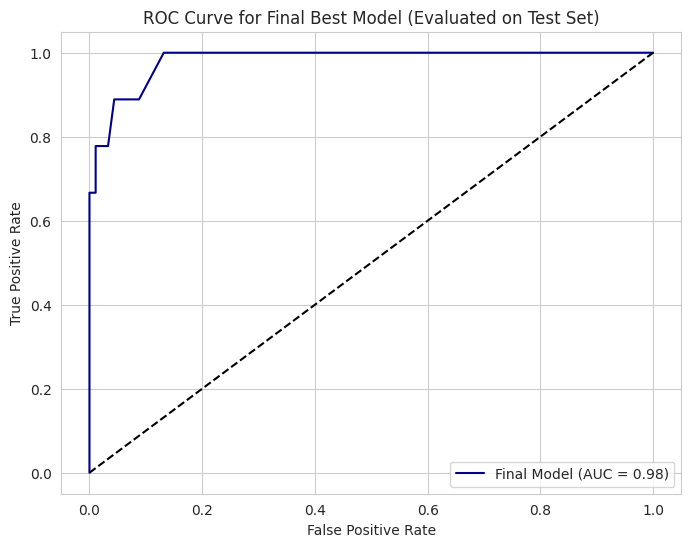

In [16]:
print("\n--- D. Cross-Validation with Hyperparameter Tuning (GridSearchCV) ---")

from sklearn.model_selection import GridSearchCV

# Define a more complex pipeline for demonstration with hyperparameter tuning
# Add a random forest classifier for hyperparameter example
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline steps
pipeline_gs = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42)) # Using RandomForest here
])

# Define parameter grid to search
# Note: Parameters for pipeline steps are accessed with '<step_name>__<parameter_name>'
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
}

# Create GridSearchCV object
# cv=skf ensures stratified splits for hyperparameter search
# scoring='roc_auc' focuses on AUC for model selection
grid_search = GridSearchCV(pipeline_gs, param_grid, cv=skf, scoring='roc_auc', n_jobs=-1, verbose=1)

# Fit GridSearchCV on the TRAINING DATA ONLY (critical!)
# The internal cross-validation will manage the splitting for tuning.
# We are fitting on X_train, y_train from the initial 80/20 split.
grid_search.fit(X_train, y_train)

print(f"\nBest parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Best cross-validation ROC AUC score: {grid_search.best_score_:.4f}")

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the FINAL, UNTOUCHED TEST SET
y_pred_final = best_model.predict(X_test)
y_prob_final = best_model.predict_proba(X_test)[:, 1]

print("\n--- Final Model Performance on Untouched Test Set ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_final))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_final):.4f}")

# Plot ROC for final model
fpr_final, tpr_final, _ = roc_curve(y_test, y_prob_final)
plt.figure(figsize=(8, 6))
plt.plot(fpr_final, tpr_final, label=f'Final Model (AUC = {roc_auc_score(y_test, y_prob_final):.2f})', color='darkblue')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Final Best Model (Evaluated on Test Set)')
plt.legend()
plt.show()

#### **Exercises & Practice (for Colab)**

**Exercise 7.5.1: Customer Churn Prediction (Full Workflow)**

You are tasked with building a model to predict customer churn. You have a dataset with numerical features and a binary target (`churn`).

Create a synthetic dataset with 1500 samples, 12 features, and a churn rate of 10%.

1.  **Initial Split:** Perform an initial stratified train-test split (80% train, 20% test) on the *raw* data. Remember to set `random_state`.
2.  **Define Pipeline:** Create a `sklearn.pipeline.Pipeline` that includes:
      * `StandardScaler` for numerical features.
      * `LogisticRegression` classifier (with `class_weight='balanced'` and `solver='liblinear'`).
3.  **Cross-Validation:** Use `StratifiedKFold` (5 splits) with `cross_val_score` on your **training data** to get a robust estimate of the model's ROC AUC score. Print the average score and its standard deviation.
4.  **Hyperparameter Tuning (Optional/Challenge):** If time permits, use `GridSearchCV` or `RandomizedSearchCV` on the **training data** to tune at least one hyperparameter of the `LogisticRegression` (e.g., `C` regularization strength). Use `StratifiedKFold` for the `cv` parameter in `GridSearchCV`.
5.  **Final Evaluation:**
      * Train the *best model* (from CV or the basic pipeline if you skipped tuning) on the *entire training set* (after preprocessing within the pipeline).
      * Evaluate its performance (Classification Report, Confusion Matrix, ROC AUC) on the **untouched test set**.


## **7.6 Preprocessing Pipelines with scikit-learn**

#### **7.6.1 The Need for Pipelines**

As we've learned, machine learning workflows often involve several sequential steps:

1.  **Feature Engineering:** Creating new features or transforming existing ones.
2.  **Imputation:** Handling missing values.
3.  **Encoding:** Converting categorical features to numerical.
4.  **Scaling:** Normalizing or standardizing numerical features.
5.  **Model Training:** Fitting the chosen machine learning algorithm.

Without pipelines, managing these steps can become cumbersome:

  * **Repetitive Code:** You'd need to manually apply each transformation to both your training and test sets, ensuring consistency.
  * **Data Leakage Risk:** It's easy to accidentally fit a scaler or an imputer on the test set if not explicitly careful, leading to overly optimistic results.
  * **Complex Hyperparameter Tuning:** Tuning parameters for both preprocessing steps and the model becomes difficult with separate operations.
  * **Deployment Challenges:** Deploying a model requires replicating the exact preprocessing steps used during training.

`scikit-learn`'s `Pipeline` object addresses these challenges by encapsulating all transformations and the final estimator into a single object.

-----

#### **7.6.2 `sklearn.pipeline.Pipeline`**

**Concept:**
A `Pipeline` sequentially applies a list of transformers and a final estimator. When you call `fit` on the pipeline, each transformer's `fit_transform` method is called on the data in order, and then the final estimator's `fit` method is called on the transformed data. When you call `predict` (or `transform` for an intermediate pipeline), each transformer's `transform` method is called, and then the final estimator's `predict` method.

**Benefits:**

  * **Convenience:** All steps are treated as a single estimator.
  * **Encapsulation:** Keeps preprocessing and modeling logic together.
  * **Data Leakage Prevention:** `fit` is called only once on the training data, and then `transform` is called consistently on all subsequent data (validation, test). This prevents information from the test set leaking into the training phase of preprocessing steps.
  * **Streamlined Hyperparameter Tuning:** You can tune hyperparameters of any step in the pipeline using `GridSearchCV` or `RandomizedSearchCV` by simply prefixing the parameter name with the step name (e.g., `'scaler__strategy'`).

**Basic Structure:**

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define steps as (name, transformer/estimator) tuples
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions (data automatically transformed)
predictions = pipeline.predict(X_test)

#### **7.6.3 `sklearn.compose.ColumnTransformer`**

**Concept:**
While `Pipeline` applies transformations sequentially to the *entire* dataset, often different columns require different preprocessing. For example, numerical columns need scaling, categorical columns need encoding, and some columns might need to be dropped. `ColumnTransformer` handles this by applying specific transformers to specific subsets of columns.

**Benefits:**

  * **Selective Transformation:** Apply different transformations to different columns.
  * **Column Preservation:** Option to include or exclude columns not explicitly transformed (`remainder='passthrough'` or `remainder='drop'`).
  * **Integration with Pipeline:** A `ColumnTransformer` can be a step within a larger `Pipeline`.

**Basic Structure:**

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

numerical_cols = ['age', 'income']
categorical_cols = ['city', 'gender']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),       # Apply StandardScaler to numerical_cols
        ('cat', OneHotEncoder(), categorical_cols),     # Apply OneHotEncoder to categorical_cols
        ('impute', SimpleImputer(strategy='mean'), ['missing_feature']) # Apply imputer to a specific column
    ],
    remainder='passthrough' # Keep other columns untouched, or 'drop' them
)

# Now, `preprocessor` can be the first step in a Pipeline

#### **7.6.4 Combining `Pipeline` and `ColumnTransformer` for a Full Workflow**

This is where the power comes in. You can define a comprehensive preprocessing step using `ColumnTransformer` and then chain it with your final model using `Pipeline`.

In [23]:
# Full Example Pipeline Structure
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# 1. Define column types
numerical_features = ['numerical_1', 'numerical_2']
categorical_nominal_features = ['category_A', 'category_B']
categorical_ordinal_features = ['education_level'] # Assume already defined mapping externally
# Columns to be dropped or passed through implicitly are handled by remainder

# Define the ordinal mapping for `OrdinalEncoder`
education_order = ['High School', 'Bachelor', 'Master', 'PhD']

# 2. Create the ColumnTransformer for preprocessing
data_preprocessor = ColumnTransformer(
    transformers=[
        ('num_scaler', StandardScaler(), numerical_features),
        ('cat_ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), categorical_nominal_features),
        ('cat_ord', OrdinalEncoder(categories=[education_order]), categorical_ordinal_features),
        # You could also add imputation here if needed, e.g.:
        # ('imputer_num', SimpleImputer(strategy='mean'), numerical_features_with_missing),
    ],
    remainder='drop' # or 'passthrough' depending on if you want to keep other columns
)

# 3. Create the full Pipeline
full_pipeline = Pipeline(steps=[
    ('preprocessor', data_preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# X_train, y_train, X_test, y_test are already defined and split (CRITICAL!)
# full_pipeline.fit(X_train, y_train)
# y_pred = full_pipeline.predict(X_test)


#### **7.6.5 Integrating `imbalanced-learn` Pipelines**

When handling imbalanced datasets, `imbalanced-learn` provides its own `Pipeline` class (`imblearn.pipeline.Pipeline`) which is designed to correctly integrate resampling steps (like SMOTE) **after** preprocessing and **before** the final estimator. `sklearn.pipeline.Pipeline` does not natively support resampling steps because they modify the sample count, which `sklearn`'s `Pipeline` expects to remain constant between transformers.

  * **`imblearn.pipeline.Pipeline` vs. `sklearn.pipeline.Pipeline`:**
      * `sklearn.pipeline.Pipeline`: All transformers must implement `fit_transform` and `transform`. They usually do not change the number of samples.
      * `imblearn.pipeline.Pipeline`: Allows transformers (like resampling algorithms) that change the number of samples (`fit_resample` method) to be included correctly.

**Example with Imbalanced-learn:**

In [24]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

# Re-use the data_preprocessor defined above
# data_preprocessor = ColumnTransformer(...)

imb_pipeline = ImbPipeline(steps=[
    ('preprocessor', data_preprocessor), # Preprocessing (scaling, encoding, etc.)
    ('sampler', SMOTE(random_state=42)), # Resampling (ONLY applies to training data within CV folds)
    ('classifier', LogisticRegression(random_state=42))
])

# Now use `imb_pipeline` with GridSearchCV or cross_val_score
# It will ensure SMOTE is applied only on the training folds during CV.
# imb_pipeline.fit(X_train, y_train)
# predictions = imb_pipeline.predict(X_test)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Install imbalanced-learn if not already
# !pip install imbalanced-learn
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
np.random.seed(42) # for reproducibility

print("Libraries loaded successfully for Preprocessing Pipelines!")

# Create a synthetic dataset with mixed data types and some imbalance
def create_complex_dataset(n_samples=1000, imbalance_ratio=0.1):
    data = {
        'Numerical_Cont': np.random.normal(50, 15, n_samples),
        'Numerical_Int': np.random.randint(0, 100, n_samples),
        'Categorical_Nominal': np.random.choice(['A', 'B', 'C', 'D'], n_samples, p=[0.25, 0.25, 0.25, 0.25]),
        'Categorical_Ordinal': np.random.choice(['Low', 'Medium', 'High', 'Very High'], n_samples, p=[0.3, 0.3, 0.2, 0.2]),
        'Missing_Feature': np.random.normal(10, 2, n_samples),
        'Target': np.random.choice([0, 1], n_samples, p=[1-imbalance_ratio, imbalance_ratio])
    }
    df = pd.DataFrame(data)

    # Introduce some missing values
    df.loc[np.random.choice(df.index, size=int(n_samples * 0.05), replace=False), 'Missing_Feature'] = np.nan
    df.loc[np.random.choice(df.index, size=int(n_samples * 0.02), replace=False), 'Numerical_Cont'] = np.nan

    return df

df_complex = create_complex_dataset(n_samples=500, imbalance_ratio=0.10) # 10% minority class

print("Original Complex Dataset Head:")
print(df_complex.head())
print("\nTarget Class Distribution:")
print(df_complex['Target'].value_counts())
print("\nMissing values before preprocessing:")
print(df_complex.isnull().sum())

# Separate features (X) and target (y)
X = df_complex.drop('Target', axis=1)
y = df_complex['Target']

# Define train-test split (CRITICAL FIRST STEP)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set shape: {X_train.shape}, Test set shape: {X_test.shape}")
print(f"Train set target distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test set target distribution:\n{y_test.value_counts(normalize=True)}")

Libraries loaded successfully for Preprocessing Pipelines!
Original Complex Dataset Head:
   Numerical_Cont  Numerical_Int Categorical_Nominal Categorical_Ordinal  \
0       57.450712             25                   C           Very High   
1       47.926035             63                   A              Medium   
2       59.715328             97                   A              Medium   
3       72.845448             58                   B                High   
4       46.487699             55                   C           Very High   

   Missing_Feature  Target  
0        10.281772       0  
1         6.463121       0  
2        10.646335       0  
3         9.704795       0  
4         9.067927       0  

Target Class Distribution:
Target
0    447
1     53
Name: count, dtype: int64

Missing values before preprocessing:
Numerical_Cont         10
Numerical_Int           0
Categorical_Nominal     0
Categorical_Ordinal     0
Missing_Feature        25
Target                  0
dtype:

#### **A. Defining the Preprocessing Steps with `ColumnTransformer`**

In [26]:
print("\n--- A. Defining the Preprocessing Steps with ColumnTransformer ---")

# 1. Identify column types
numerical_cols = ['Numerical_Cont', 'Numerical_Int']
categorical_nominal_cols = ['Categorical_Nominal']
categorical_ordinal_cols = ['Categorical_Ordinal']
missing_feature_cols = ['Missing_Feature'] # This column also needs imputation and then scaling

# Define the ordinal mapping for 'Categorical_Ordinal'
ordinal_category_order = ['Low', 'Medium', 'High', 'Very High']

# 2. Create individual transformers
# Numerical transformer: Impute missing values with mean, then scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical Nominal transformer: One-Hot Encode
categorical_nominal_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'))
])

# Categorical Ordinal transformer: Ordinal Encode with specified order
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal_encoder', OrdinalEncoder(categories=[ordinal_category_order]))
])

# 3. Combine transformers using ColumnTransformer
preprocessor_full = ColumnTransformer(
    transformers=[
        ('num_pipeline', numerical_transformer, numerical_cols + missing_feature_cols), # Apply numerical pipeline to these
        ('cat_nom', categorical_nominal_transformer, categorical_nominal_cols),
        ('cat_ord', categorical_ordinal_transformer, categorical_ordinal_cols)
    ],
    remainder='drop' # Drop any columns not specified
)

print("\nColumnTransformer created successfully:")
print(preprocessor_full)

# Test the preprocessor on a small part of X_train to see output (optional)
# X_train_processed_sample = preprocessor_full.fit_transform(X_train.head())
# print("\nShape of processed training sample:", X_train_processed_sample.shape)
# print("Processed training sample (first 5 rows):\n", X_train_processed_sample[:5])


--- A. Defining the Preprocessing Steps with ColumnTransformer ---

ColumnTransformer created successfully:
ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Numerical_Cont', 'Numerical_Int',
                                  'Missing_Feature']),
                                ('cat_nom',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Categorical_Nominal']),
                                ('cat_ord',
                                 Pipeline(steps=[('ordinal_encoder',
                             

#### **B. Building the Full `scikit-learn` Pipeline**


--- B. Building the Full scikit-learn Pipeline ---

Full scikit-learn Pipeline created successfully:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Numerical_Cont',
                                                   'Numerical_Int',
                                                   'Missing_Feature']),
                                                 ('cat_nom',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                

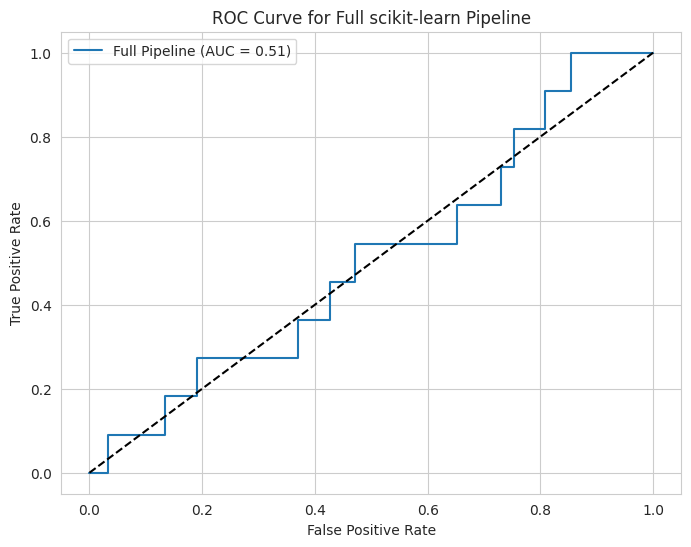

In [27]:
print("\n--- B. Building the Full scikit-learn Pipeline ---")

# Define the final model
classifier = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced') # Using balanced class weight

# Create the full pipeline
# The first step is our preprocessor (ColumnTransformer)
# The second step is the classifier
full_sklearn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_full),
    ('classifier', classifier)
])

print("\nFull scikit-learn Pipeline created successfully:")
print(full_sklearn_pipeline)

# Train the pipeline on the training data
print("\nFitting the pipeline on training data...")
full_sklearn_pipeline.fit(X_train, y_train)
print("Pipeline fitting complete.")

# Make predictions on the untouched test data
y_pred_pipeline = full_sklearn_pipeline.predict(X_test)
y_prob_pipeline = full_sklearn_pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\n--- Model Performance with Full scikit-learn Pipeline on Test Set ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_pipeline))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_pipeline))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_prob_pipeline):.4f}")

# Plot ROC curve
fpr_pipeline, tpr_pipeline, _ = roc_curve(y_test, y_prob_pipeline)
plt.figure(figsize=(8, 6))
plt.plot(fpr_pipeline, tpr_pipeline, label=f'Full Pipeline (AUC = {roc_auc_score(y_test, y_prob_pipeline):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Full scikit-learn Pipeline')
plt.legend()
plt.show()

#### **C. Building a Pipeline with `imbalanced-learn` for Resampling**


--- C. Building a Pipeline with imbalanced-learn for Resampling ---

Full imbalanced-learn Pipeline created successfully:
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Numerical_Cont',
                                                   'Numerical_Int',
                                                   'Missing_Feature']),
                                                 ('cat_nom',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
           

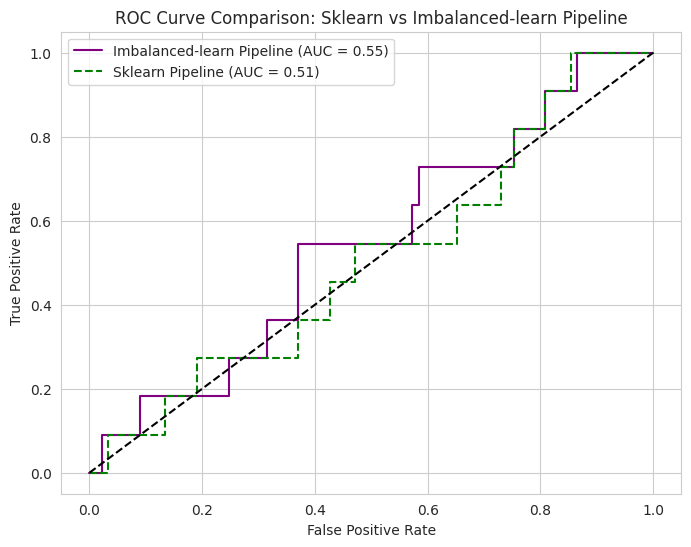

In [28]:
print("\n--- C. Building a Pipeline with imbalanced-learn for Resampling ---")

# Re-define the classifier without class_weight='balanced' if using SMOTE
# Because SMOTE changes the distribution, often you don't need class_weight
classifier_for_smote = LogisticRegression(random_state=42, solver='liblinear')

# Create the imblearn pipeline
# Note the order: preprocessor -> sampler -> classifier
full_imblearn_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor_full), # Our ColumnTransformer from before
    ('sampler', SMOTE(random_state=42)), # SMOTE will be applied AFTER preprocessing
    ('classifier', classifier_for_smote)
])

print("\nFull imbalanced-learn Pipeline created successfully:")
print(full_imblearn_pipeline)

# Train the imblearn pipeline on the training data
print("\nFitting the imbalanced-learn pipeline on training data...")
full_imblearn_pipeline.fit(X_train, y_train)
print("Imbalanced-learn Pipeline fitting complete.")

# Make predictions on the untouched test data
y_pred_imb_pipeline = full_imblearn_pipeline.predict(X_test)
y_prob_imb_pipeline = full_imblearn_pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
print("\n--- Model Performance with imbalanced-learn Pipeline on Test Set ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_imb_pipeline))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_imb_pipeline))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_prob_imb_pipeline):.4f}")

# Plot ROC curve for comparison
fpr_imb_pipeline, tpr_imb_pipeline, _ = roc_curve(y_test, y_prob_imb_pipeline)
plt.figure(figsize=(8, 6))
plt.plot(fpr_imb_pipeline, tpr_imb_pipeline, label=f'Imbalanced-learn Pipeline (AUC = {roc_auc_score(y_test, y_prob_imb_pipeline):.2f})', color='purple')
plt.plot(fpr_pipeline, tpr_pipeline, label=f'Sklearn Pipeline (AUC = {roc_auc_score(y_test, y_prob_pipeline):.2f})', linestyle='--', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Sklearn vs Imbalanced-learn Pipeline')
plt.legend()
plt.show()

#### **D. Hyperparameter Tuning with Pipelines (GridSearchCV)**

Pipelines simplify hyperparameter tuning significantly, allowing you to tune parameters for any step in the pipeline.


--- D. Hyperparameter Tuning with Pipelines (GridSearchCV) ---

Starting GridSearchCV on pipeline...
Fitting 3 folds for each of 16 candidates, totalling 48 fits

Best parameters found by GridSearchCV: {'classifier__C': 10, 'preprocessor__num_pipeline__scaler': StandardScaler(), 'sampler': SMOTE(random_state=42)}
Best cross-validation ROC AUC score: 0.5257

--- Final Model Performance (from GridSearchCV) on Untouched Test Set ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.62      0.74        89
           1       0.15      0.55      0.24        11

    accuracy                           0.61       100
   macro avg       0.53      0.58      0.49       100
weighted avg       0.83      0.61      0.68       100


Confusion Matrix:
[[55 34]
 [ 5  6]]

ROC AUC Score: 0.5495


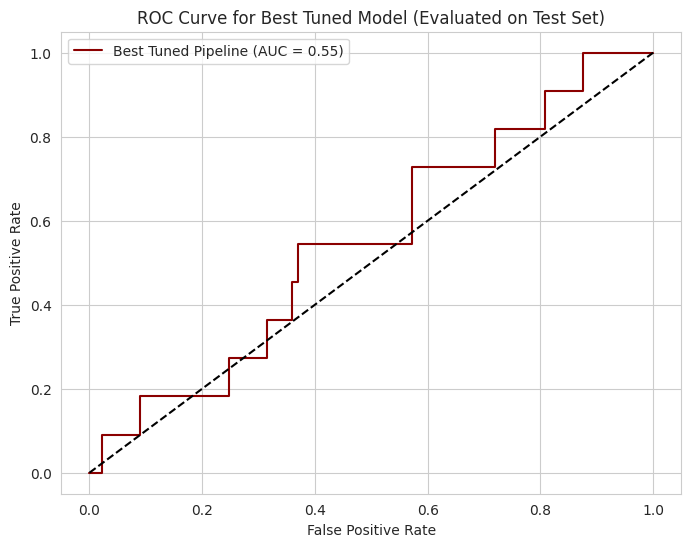

In [29]:
print("\n--- D. Hyperparameter Tuning with Pipelines (GridSearchCV) ---")

# We'll use the imbalanced-learn pipeline for this example
# Define parameters to search. Syntax: '<step_name>__<parameter_name>'
param_grid_pipeline = {
    'preprocessor__num_pipeline__scaler': [StandardScaler(), 'passthrough'], # Try with and without scaling num features
    'classifier__C': [0.01, 0.1, 1, 10], # Regularization strength for Logistic Regression
    'sampler': [SMOTE(random_state=42), 'passthrough'] # Try with and without SMOTE
}

# Ensure to use the imblearn pipeline if 'sampler' is a parameter being tuned.
# If you only tune preprocessor/classifier, sklearn.pipeline.Pipeline is fine.
grid_search_pipeline = GridSearchCV(full_imblearn_pipeline, param_grid_pipeline,
                                    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), # Fewer splits for quicker demo
                                    scoring='roc_auc', n_jobs=-1, verbose=2)

print("\nStarting GridSearchCV on pipeline...")
grid_search_pipeline.fit(X_train, y_train) # Fit on training data ONLY

print(f"\nBest parameters found by GridSearchCV: {grid_search_pipeline.best_params_}")
print(f"Best cross-validation ROC AUC score: {grid_search_pipeline.best_score_:.4f}")

# Get the best model
best_pipeline_model = grid_search_pipeline.best_estimator_

# Evaluate the best model on the FINAL, UNTOUCHED TEST SET
y_pred_best = best_pipeline_model.predict(X_test)
y_prob_best = best_pipeline_model.predict_proba(X_test)[:, 1]

print("\n--- Final Model Performance (from GridSearchCV) on Untouched Test Set ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))
print(f"\nROC AUC Score: {roc_auc_score(y_test, y_prob_best):.4f}")

# Plot ROC for the best model
fpr_best, tpr_best, _ = roc_curve(y_test, y_prob_best)
plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, label=f'Best Tuned Pipeline (AUC = {roc_auc_score(y_test, y_prob_best):.2f})', color='darkred')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Tuned Model (Evaluated on Test Set)')
plt.legend()
plt.show()

#### **Exercises & Practice (for Colab)**

**Exercise 7.6.1: Housing Price Prediction Pipeline (Regression)**

You are working on a housing price prediction task. The dataset has numerical, categorical, and features with missing values.

Create a synthetic dataset with 1000 samples and the following columns:

  * `SquareFootage`: Numerical, continuous (e.g., `np.random.normal(1500, 300)`).
  * `NumBedrooms`: Numerical, integer (e.g., `np.random.randint(1, 6)`).
  * `Neighborhood`: Categorical nominal (e.g., `'Urban', 'Suburban', 'Rural'`).
  * `YearBuilt`: Numerical, integer (e.g., `np.random.randint(1950, 2020)`).
  * `Renovated`: Categorical binary (e.g., `'Yes', 'No'`).
  * `GarageSize`: Numerical, continuous, with some missing values (e.g., `np.random.normal(400, 100)` and introduce `np.nan`).
  * `Price` (Target): Numerical, continuous (e.g., `SquareFootage * 200 + NumBedrooms * 5000 + ...`).

**Tasks:**

1.  **Data Generation & Initial Split:**
      * Generate the synthetic dataset.
      * Perform an initial train-test split (80% train, 20% test).
2.  **Define Preprocessing with `ColumnTransformer`:**
      * For `SquareFootage`, `NumBedrooms`, `YearBuilt`: Apply `StandardScaler`.
      * For `Neighborhood`, `Renovated`: Apply `OneHotEncoder` (remember `drop_first=True` and `handle_unknown='ignore'`).
      * For `GarageSize`: Apply `SimpleImputer` (e.g., `strategy='mean'`) followed by `StandardScaler`.
3.  **Build Full Pipeline:** Create a `sklearn.pipeline.Pipeline` that includes your `ColumnTransformer` and a `LinearRegression` model.
4.  **Train & Evaluate:**
      * Fit the pipeline on the training data.
      * Make predictions on the test data.
      * Evaluate the model using regression metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) using `sklearn.metrics`.
